# **Data-Driven Early Warning and Support System for At-Risk Learners in Rwanda Higher Education programs**

This notebook aim to train and evaluate a multiclass for for predicting student who are at risk, It will integrate XAI for interpretability of the prediction to get clear view why the model is producing those predictions

This notebook will have different section including:
* Exploratory Data Analysis
* Data Preprocessing & Feature Engineering
* Model Implementation & Optimization
* Experiment & Trails/Result Table
* Model Evaluation & Error Analysis

## **Package imports and loading dataset**

In [ ]:
# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import shap
import joblib
warnings.filterwarnings('ignore')

In [ ]:
#Load data from the source
dt = pd.read_csv('student_dropout.csv', sep=';')
dt.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
dt.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification     

In [ ]:
dt.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%                        1.000000                1.000000   
50%                        1.000000                1.000000   
75%                        1.000000                1.000000   
max                        1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                           

In [ ]:
# Remove space in columns names to avoid value error and better column naming
dt.columns = dt.columns.str.replace(' ', '_')
print(dt.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(dt.isnull().sum())


Missing Values:
Marital_status                                    0
Application_mode                                  0
Application_order                                 0
Course                                            0
Daytime/evening_attendance\t                      0
Previous_qualification                            0
Previous_qualification_(grade)                    0
Nacionality                                       0
Mother's_qualification                            0
Father's_qualification                            0
Mother's_occupation                               0
Father's_occupation                               0
Admission_grade                                   0
Displaced                                         0
Educational_special_needs                         0
Debtor                                            0
Tuition_fees_up_to_date                           0
Gender                                            0
Scholarship_holder                             

No missing values found in the dataset, I will continue and check for duplicates to see if there are any duplicates.

In [ ]:
# Check for duplicates
print("\nDuplicate Rows:")
print(dt.duplicated().sum())


Duplicate Rows:
0


No duplicates found in the dataset. By cleaning the dataset I will proceed to Exploratory Data Analysis.

## **Exploratoty Data Analysis**

In this section I will be looking for the relationship between the features of the dataset and the target, those found not having impact on the target will be potentially removed from modeling.


Target Variable Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


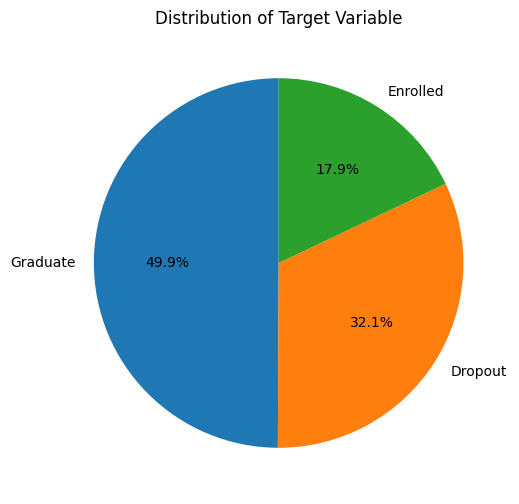

In [ ]:
# Distribution of the target varaible
print("\nTarget Variable Distribution:")
print(dt.iloc[:, -1].value_counts())

#visulize target distribution
values = dt.iloc[:, -1].value_counts().values
labels = dt.iloc[:, -1].value_counts().index
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.show()

From the plot above, I can see there is an imbalance in the dataset for the target variables. This means I will have to handle this class imbalance in order for my model to not be baised

### **Feature-Target Relationship Analysis**

After examining the target variable distribution to assess class imbalance,
this step focuses on understanding how different feature groups
(Academic, Demographic, and Financial) relate to the target.

**Purpose:**
To identify patterns and potential predictors by exploring how each feature
distributes across the target variable categories.

I will use:
- *Countplots* for categorical features to visualize how
     target categories vary across feature levels.
- *Boxplots* for numerical features to observe differences
     in central tendency, spread, and outliers between target classes.
- *Chi-square tests* will apply to categorical features to check
     whether observed differences in distribution are statistically significant.
- *ANOVA tests* will apply to numerical features to evaluate whether
     group means differ significantly across target categories.

**Goal**: To identify which features show meaningful relationships
   with the target before model training.


For better analysis I will group the features into academic, demographic, and financial categories. So that I know what features are impacting the target and thier category.

In [ ]:
# Group features into categories
academic_features = [
    'Course',
    'Previous_qualification',
    'Previous_qualification_(grade)',
    'Admission_grade',
    'Curricular_units_1st_sem_(credited)',
    'Curricular_units_1st_sem_(enrolled)',
    'Curricular_units_1st_sem_(evaluations)',
    'Curricular_units_1st_sem_(approved)',
    'Curricular_units_1st_sem_(grade)',
    'Curricular_units_1st_sem_(without_evaluations)',
    'Curricular_units_2nd_sem_(credited)',
    'Curricular_units_2nd_sem_(enrolled)',
    'Curricular_units_2nd_sem_(evaluations)',
    'Curricular_units_2nd_sem_(approved)',
    'Curricular_units_2nd_sem_(grade)',
    'Curricular_units_2nd_sem_(without_evaluations)'
]

demographic_features = [
    'Marital_status',
    'Application_mode',
    'Application_order',
    'Daytime/evening_attendance\t',
    'Nacionality',
    'Mother\'s_qualification',
    'Father\'s_qualification',
    'Mother\'s_occupation',
    'Father\'s_occupation',
    'Displaced',
    'Educational_special_needs',
    'Gender',
    'Age_at_enrollment',
    'International'
]

financial_features = [
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

# Print the categorized features
print("Academic Features:", academic_features)
print("\nDemographic Features:", demographic_features)
print("\nFinancial Features:", financial_features)

Academic Features: ['Course', 'Previous_qualification', 'Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(credited)', 'Curricular_units_1st_sem_(enrolled)', 'Curricular_units_1st_sem_(evaluations)', 'Curricular_units_1st_sem_(approved)', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_1st_sem_(without_evaluations)', 'Curricular_units_2nd_sem_(credited)', 'Curricular_units_2nd_sem_(enrolled)', 'Curricular_units_2nd_sem_(evaluations)', 'Curricular_units_2nd_sem_(approved)', 'Curricular_units_2nd_sem_(grade)', 'Curricular_units_2nd_sem_(without_evaluations)']

Demographic Features: ['Marital_status', 'Application_mode', 'Application_order', 'Daytime/evening_attendance\t', 'Nacionality', "Mother's_qualification", "Father's_qualification", "Mother's_occupation", "Father's_occupation", 'Displaced', 'Educational_special_needs', 'Gender', 'Age_at_enrollment', 'International']

Financial Features: ['Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'U

In [ ]:
# This function is to analyze one feature group distribution
from scipy.stats import chi2_contingency, f_oneway


def analyze_feature_group(df, features, group_name, target='Target'):
    print(f"\n Analyzing {group_name} Features \n")
    results = []

    for feature in features:
        print(f"\nFeature: {feature}")
        if feature not in df.columns:
            print(f" Skipped: {feature} not found in dataset.")
            continue

        unique_vals = df[feature].nunique()
        print(f"Unique values: {unique_vals}")

        if df[feature].dtype == 'object' or unique_vals < 20:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=feature, hue=target)
            plt.title(f'{target} Distribution by {feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Statistical Test: Chi-Square
            contingency = pd.crosstab(df[feature], df[target])
            chi2, p, dof, _ = chi2_contingency(contingency)
            print(f"Chi-square Test → p-value: {p:.4f}")
            results.append({'Feature': feature, 'Type': 'Categorical', 'Test': 'Chi-square', 'p-value': p})

        else:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=target, y=feature)
            plt.title(f'{feature} Distribution by {target}')
            plt.tight_layout()
            plt.show()

            # Statistical Test: ANOVA
            groups = [df[df[target] == val][feature].dropna() for val in df[target].unique()]
            f_stat, p = f_oneway(*groups)
            print(f"ANOVA Test → p-value: {p:.4f}")
            results.append({'Feature': feature, 'Type': 'Numerical', 'Test': 'ANOVA', 'p-value': p})

    # Convert to summary DataFrame
    results_df = pd.DataFrame(results)
    print(f"\nSummary of {group_name} Analysis:")
    display(results_df.sort_values(by='p-value'))
    return results_df



 Analyzing Academic Features 


Feature: Course
Unique values: 17


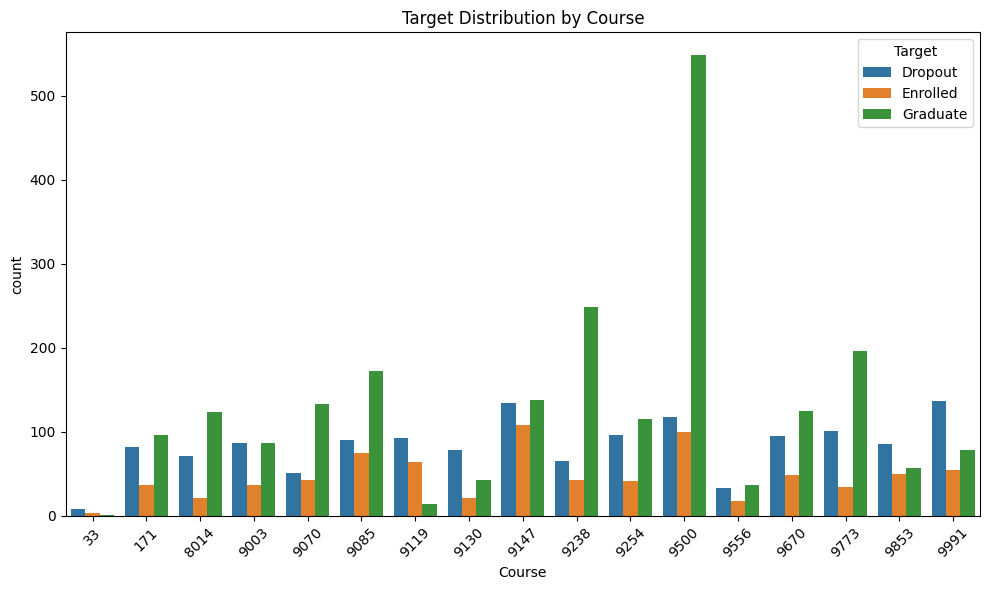

Chi-square Test → p-value: 0.0000

Feature: Previous_qualification
Unique values: 17


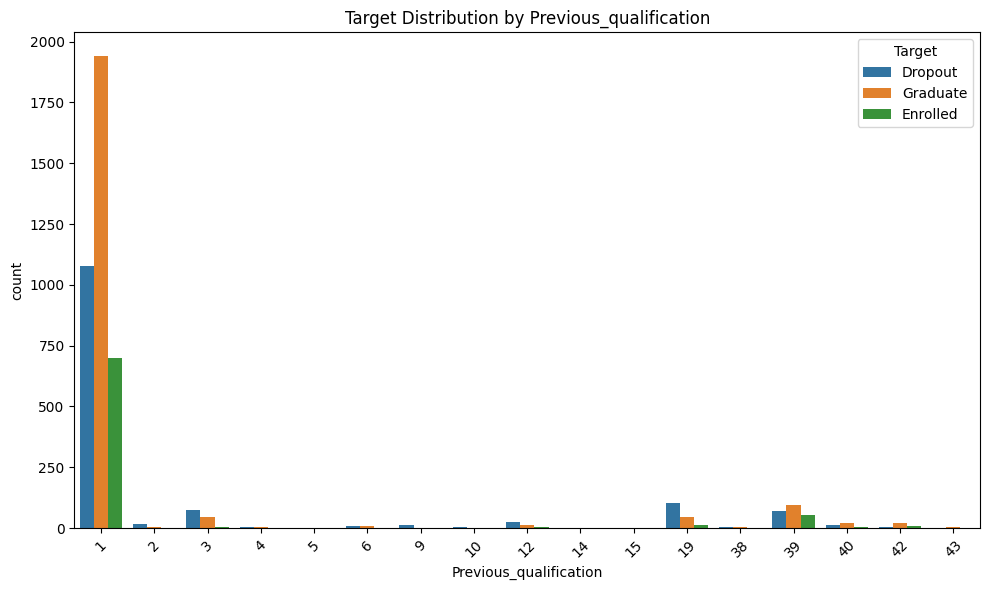

Chi-square Test → p-value: 0.0000

Feature: Previous_qualification_(grade)
Unique values: 101


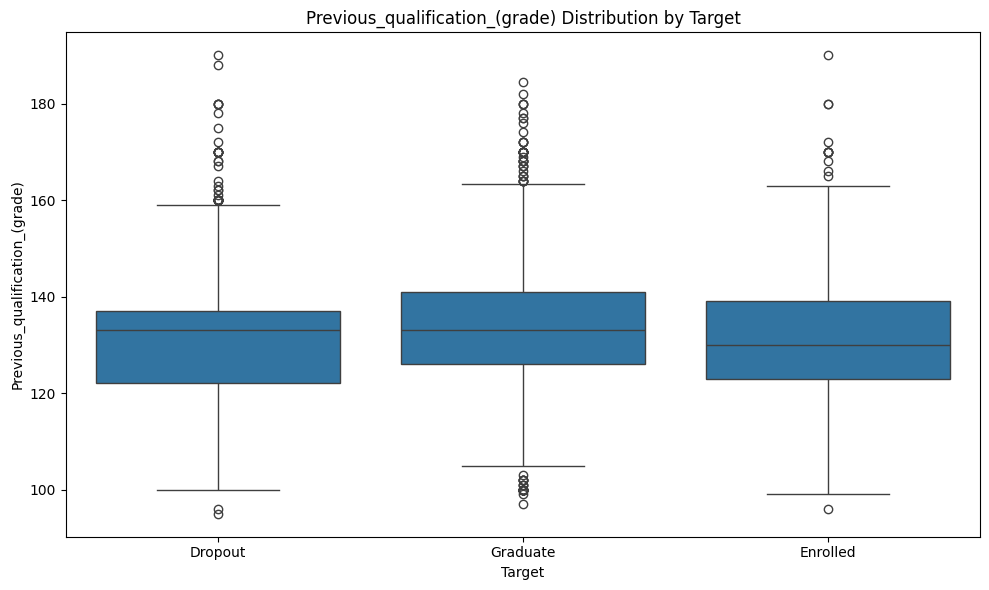

ANOVA Test → p-value: 0.0000

Feature: Admission_grade
Unique values: 620


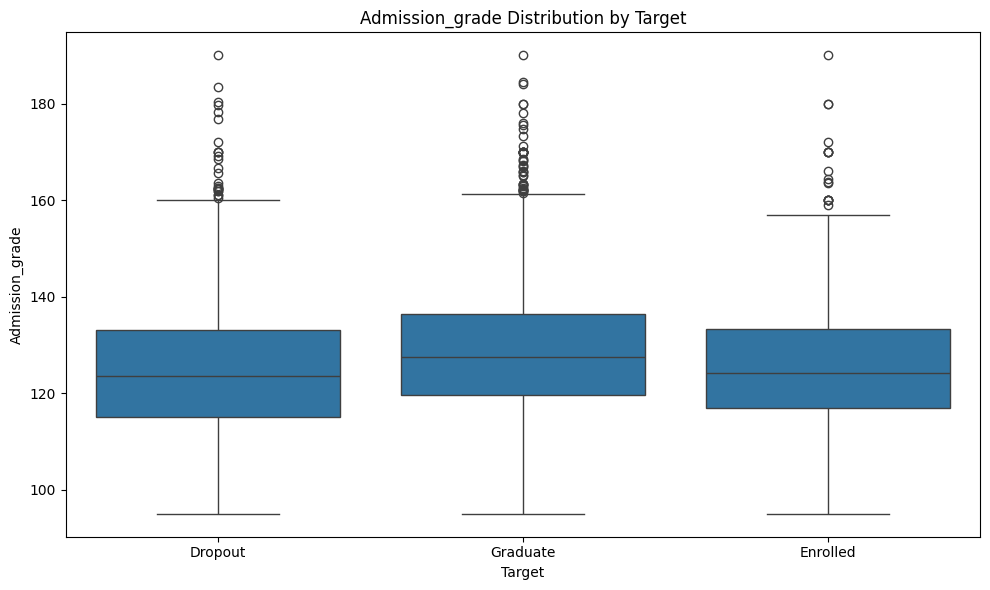

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_1st_sem_(credited)
Unique values: 21


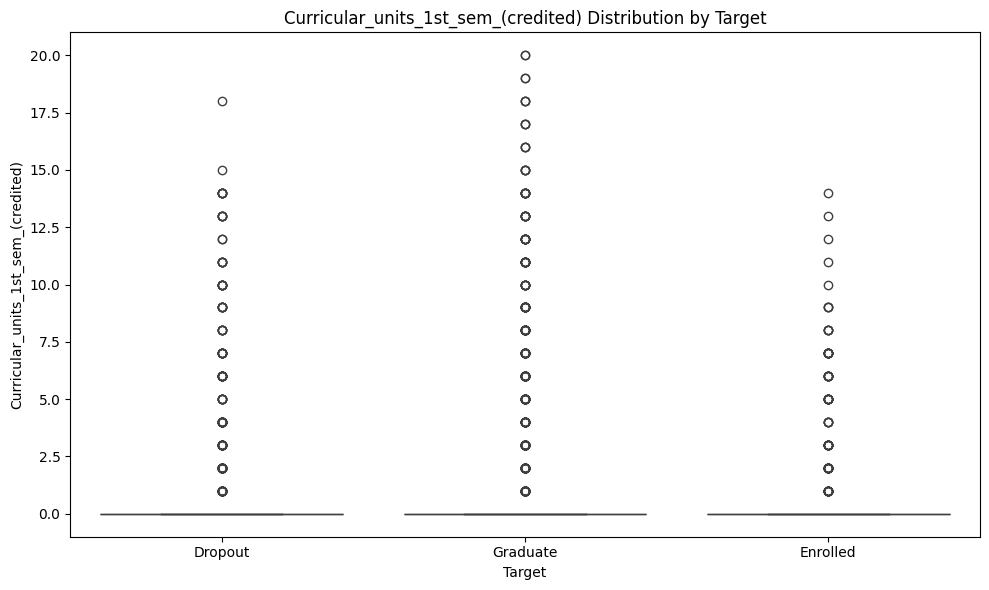

ANOVA Test → p-value: 0.0003

Feature: Curricular_units_1st_sem_(enrolled)
Unique values: 23


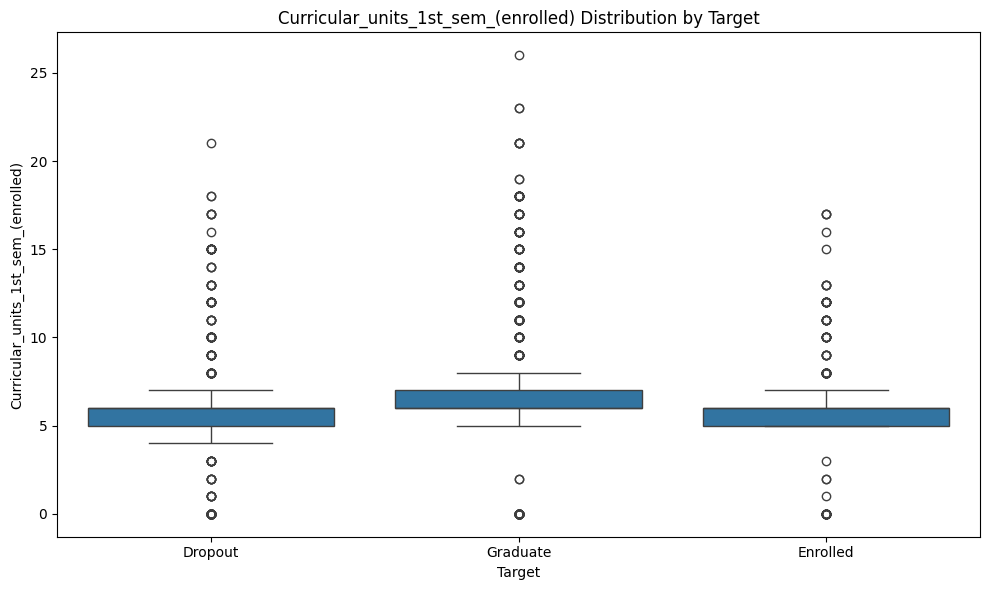

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_1st_sem_(evaluations)
Unique values: 35


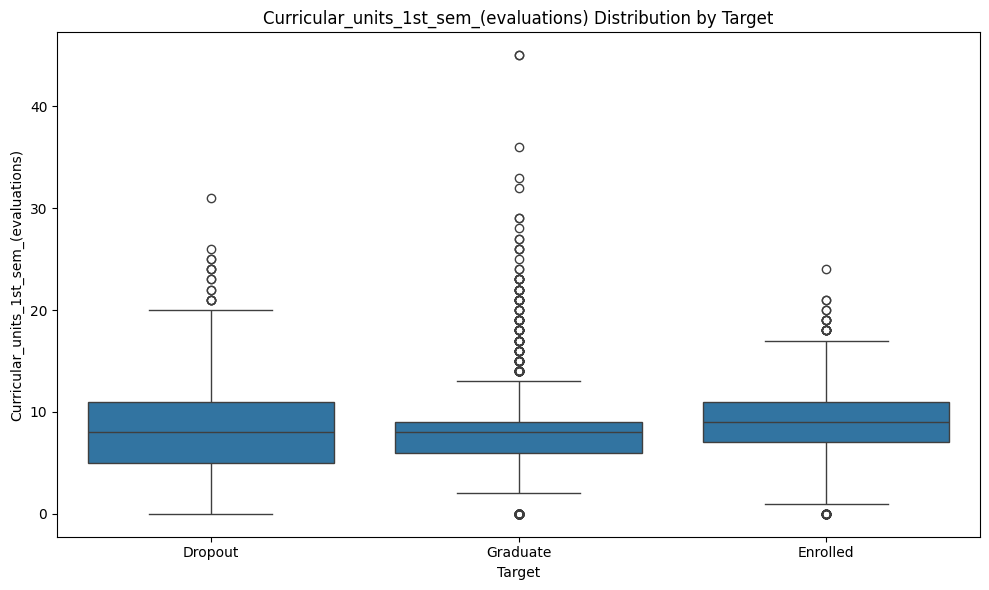

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_1st_sem_(approved)
Unique values: 23


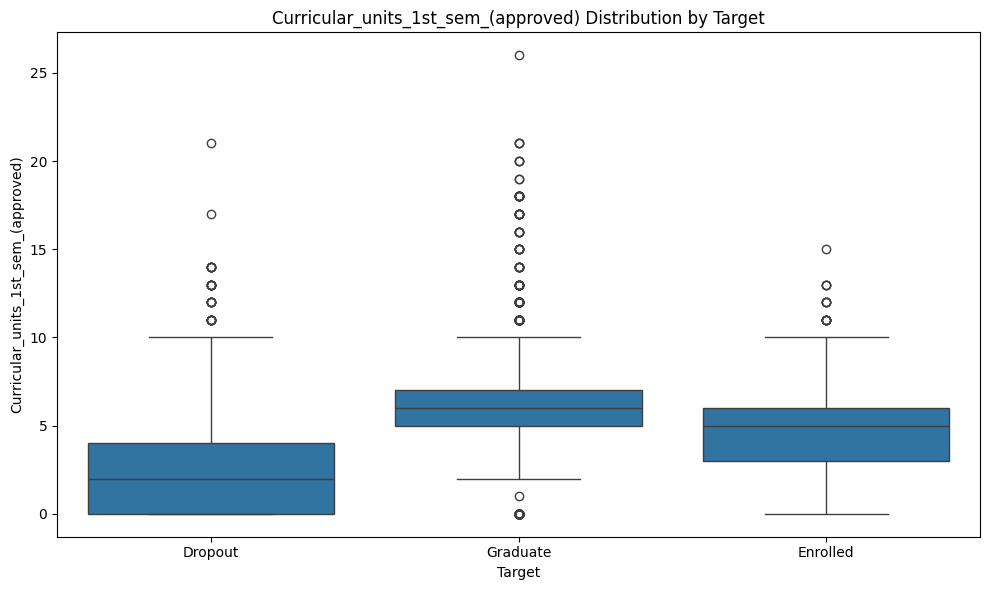

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_1st_sem_(grade)
Unique values: 805


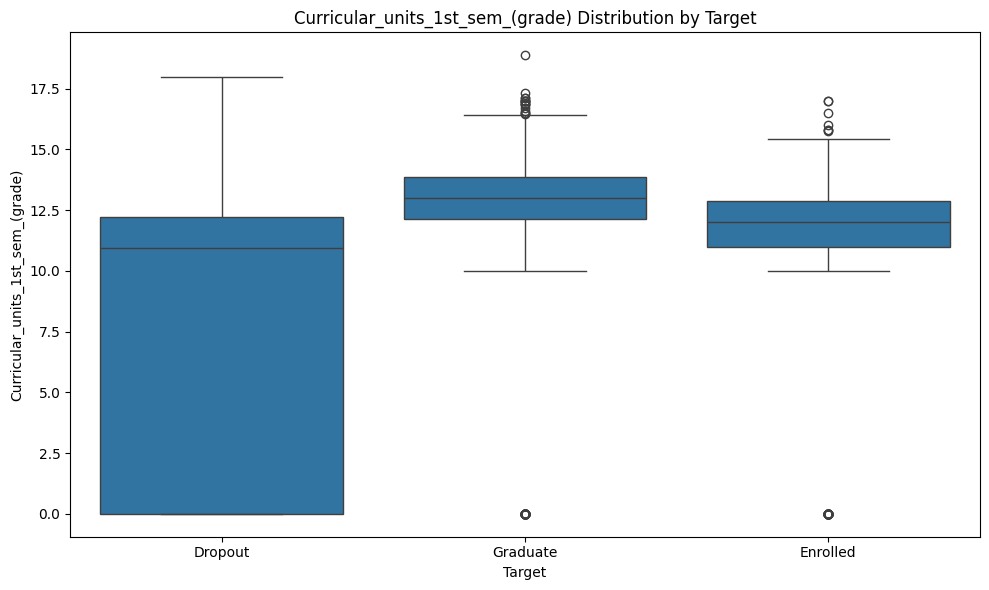

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_1st_sem_(without_evaluations)
Unique values: 11


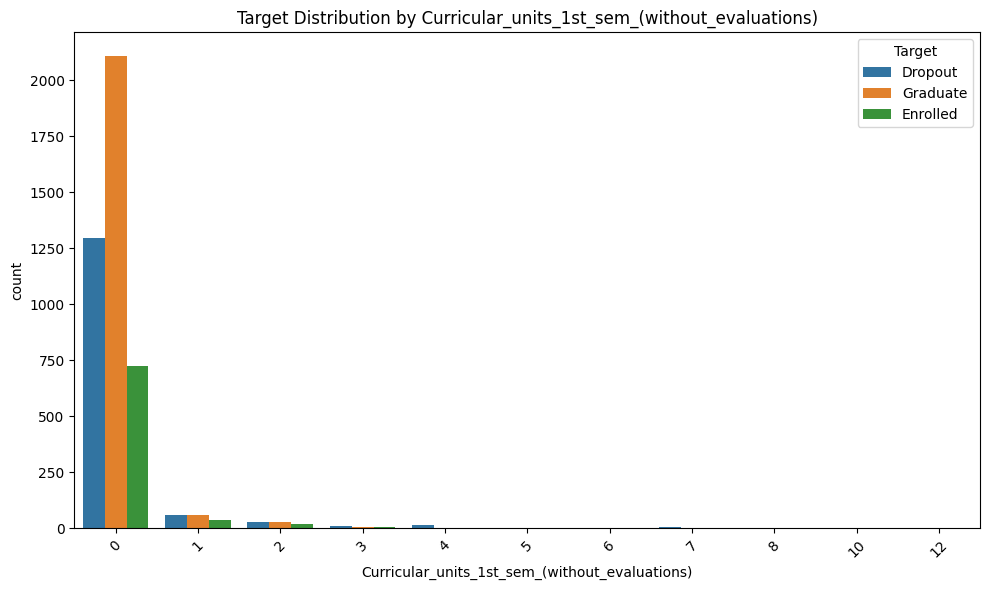

Chi-square Test → p-value: 0.0000

Feature: Curricular_units_2nd_sem_(credited)
Unique values: 19


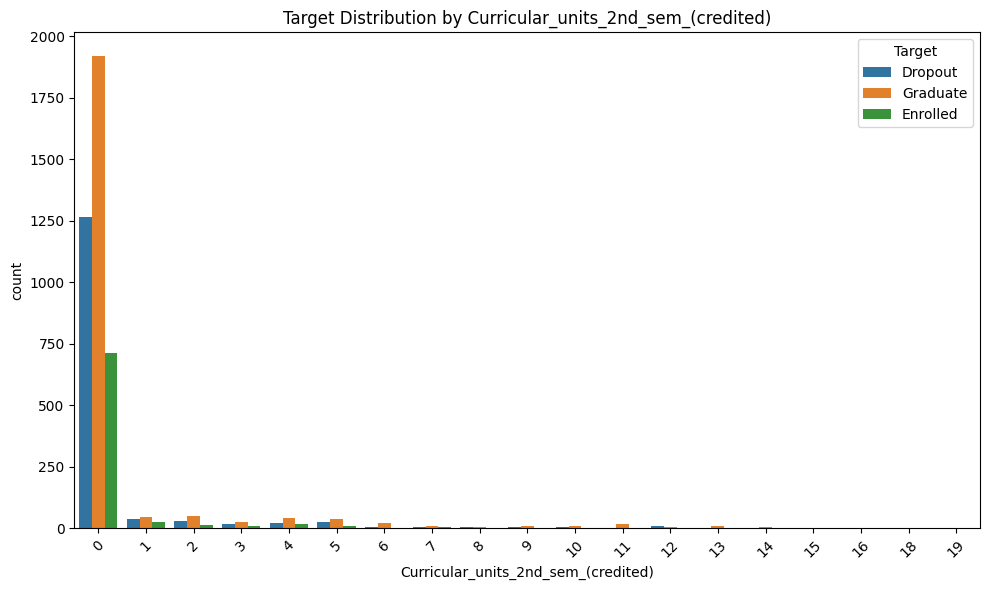

Chi-square Test → p-value: 0.0473

Feature: Curricular_units_2nd_sem_(enrolled)
Unique values: 22


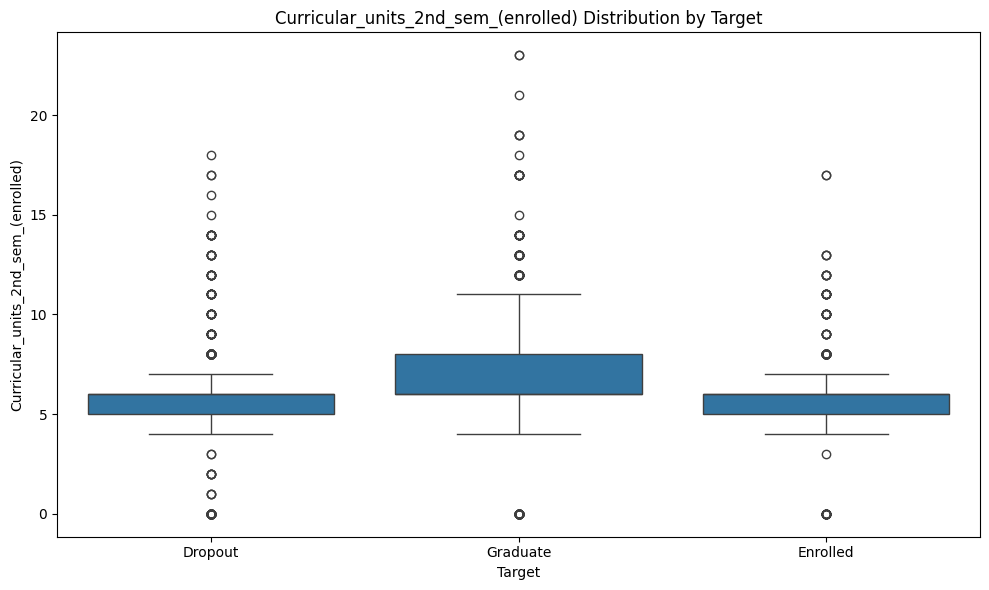

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_2nd_sem_(evaluations)
Unique values: 30


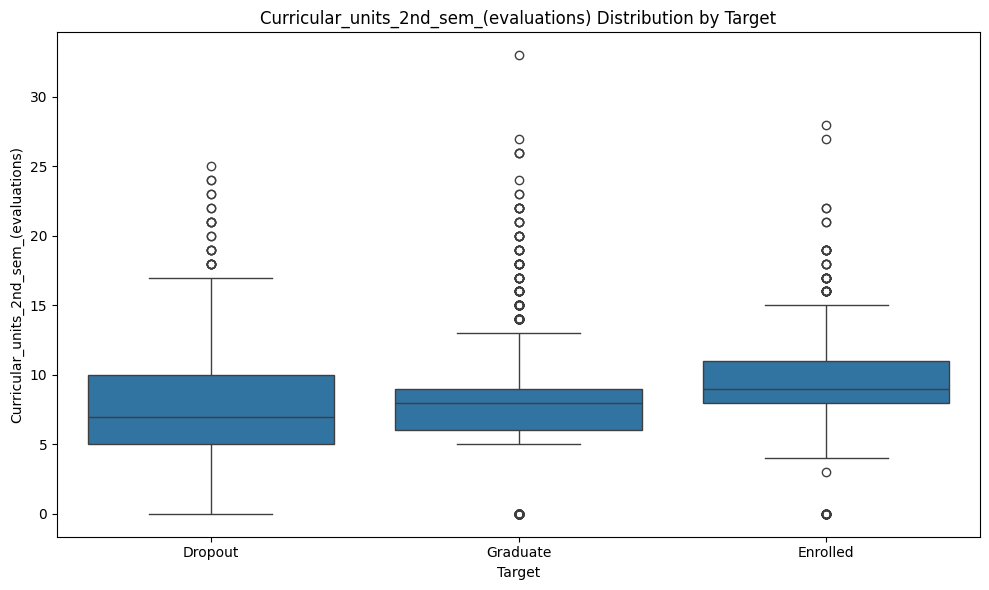

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_2nd_sem_(approved)
Unique values: 20


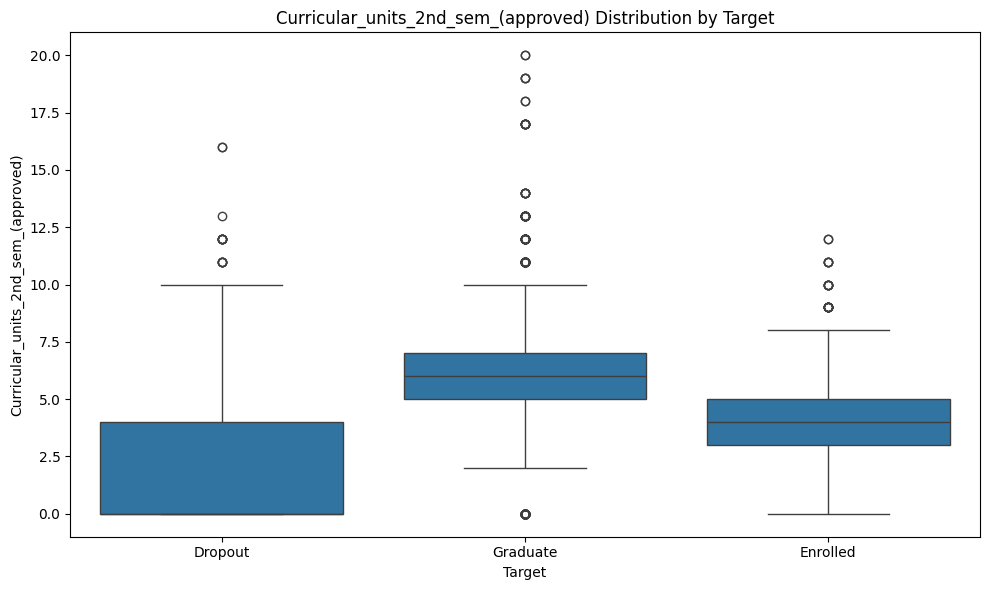

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_2nd_sem_(grade)
Unique values: 786


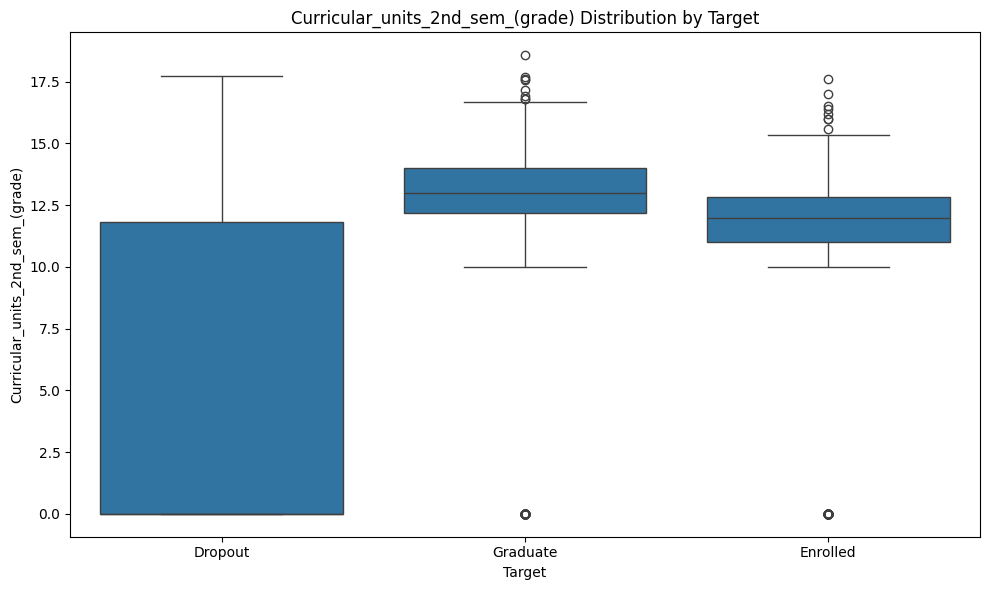

ANOVA Test → p-value: 0.0000

Feature: Curricular_units_2nd_sem_(without_evaluations)
Unique values: 10


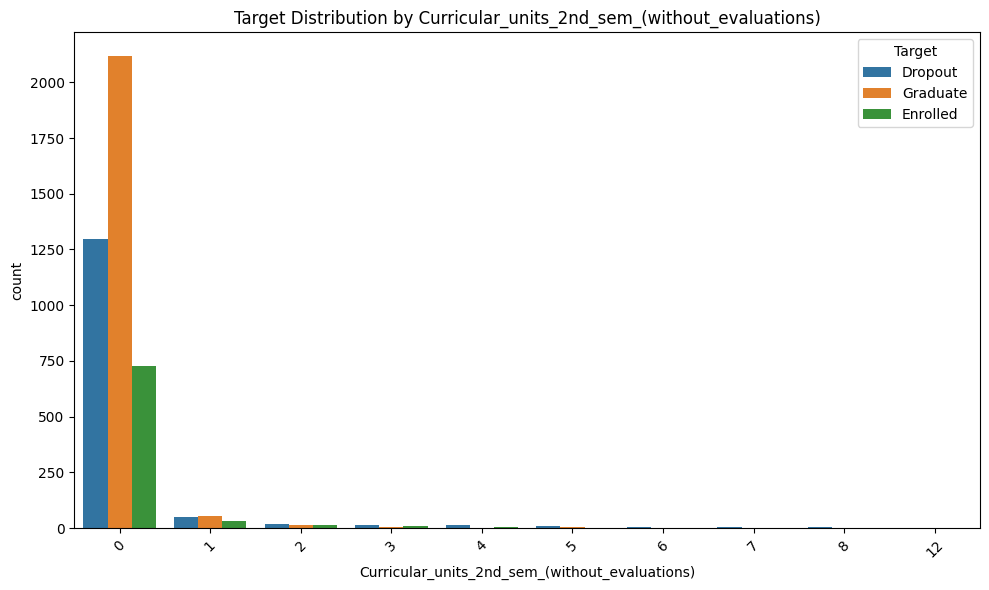

Chi-square Test → p-value: 0.0000

Summary of Academic Analysis:


Feature         Type        Test  \
13             Curricular_units_2nd_sem_(approved)    Numerical       ANOVA   
14                Curricular_units_2nd_sem_(grade)    Numerical       ANOVA   
7              Curricular_units_1st_sem_(approved)    Numerical       ANOVA   
8                 Curricular_units_1st_sem_(grade)    Numerical       ANOVA   
0                                           Course  Categorical  Chi-square   
12          Curricular_units_2nd_sem_(evaluations)    Numerical       ANOVA   
11             Curricular_units_2nd_sem_(enrolled)    Numerical       ANOVA   
1                           Previous_qualification  Categorical  Chi-square   
5              Curricular_units_1st_sem_(enrolled)    Numerical       ANOVA   
6           Curricular_units_1st_sem_(evaluations)    Numerical       ANOVA   
3                                  Admission_grade    Numerical       ANOVA   
2                   Previous_qualification_(grade)    Numerical       ANOVA   
15  Curricular_units_2nd_sem_(without_evaluations)  Categorical  Chi-square   
9   Curricular_units_1st_sem_(without_evaluations)  Categorical  Chi-square   
4              Curricular_units_1st_sem_(credited)    Numerical       ANOVA   
10             Curricular_units_2nd_sem_(credited)  Categorical  Chi-square   

          p-value  
13   0.000000e+00  
14   0.000000e+00  
7   3.649472e-316  
8   2.803052e-269  
0    2.316571e-97  
12   4.039137e-38  
11   5.244430e-33  
1    7.160305e-30  
5    3.272852e-26  
6    6.897115e-17  
3    4.380466e-16  
2    1.077783e-12  
15   1.733032e-06  
9    3.740211e-06  
4    3.474158e-04  
10   4.730393e-02

In [ ]:
# Academics group
academic_results = analyze_feature_group(dt, academic_features, "Academic", target='Target')



 Analyzing Demographic Features 


Feature: Marital_status
Unique values: 6


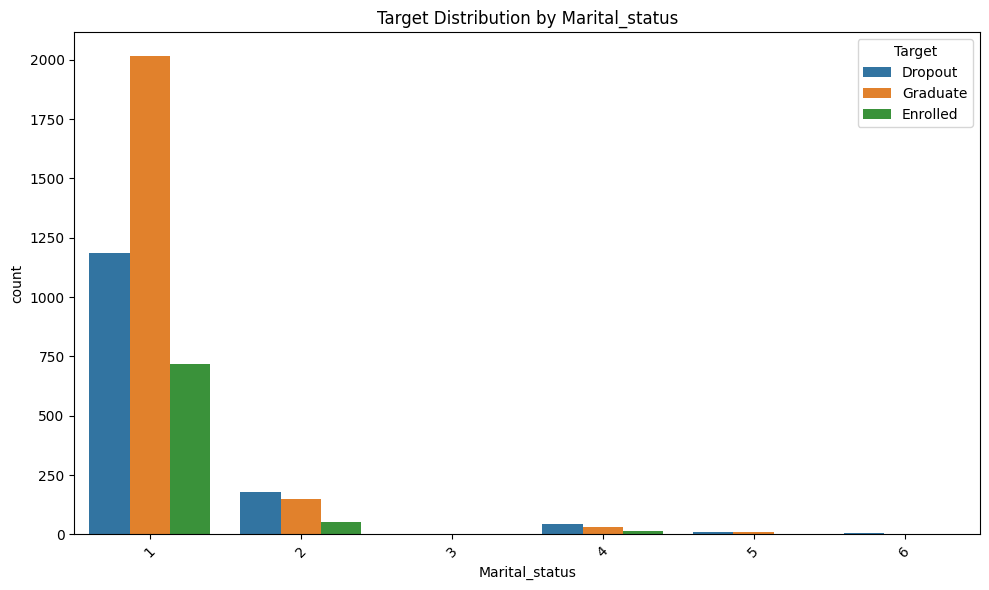

Chi-square Test → p-value: 0.0000

Feature: Application_mode
Unique values: 18


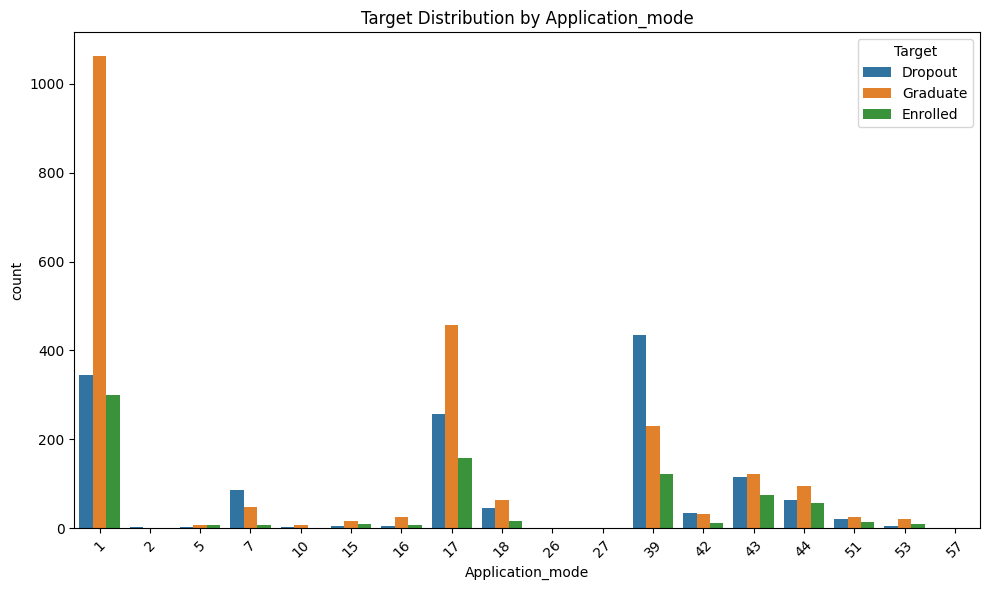

Chi-square Test → p-value: 0.0000

Feature: Application_order
Unique values: 8


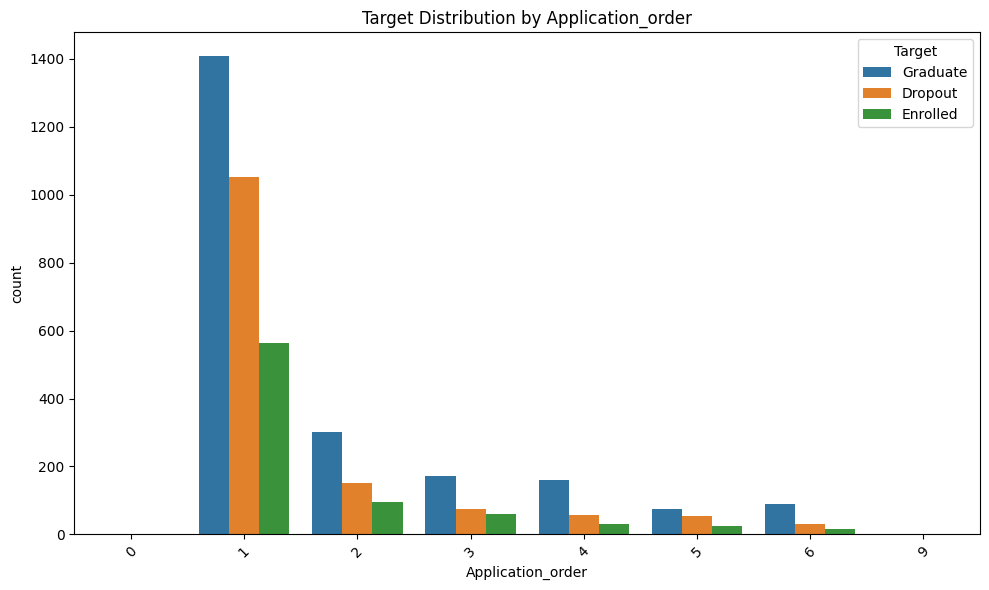

Chi-square Test → p-value: 0.0000

Feature: Daytime/evening_attendance	
Unique values: 2


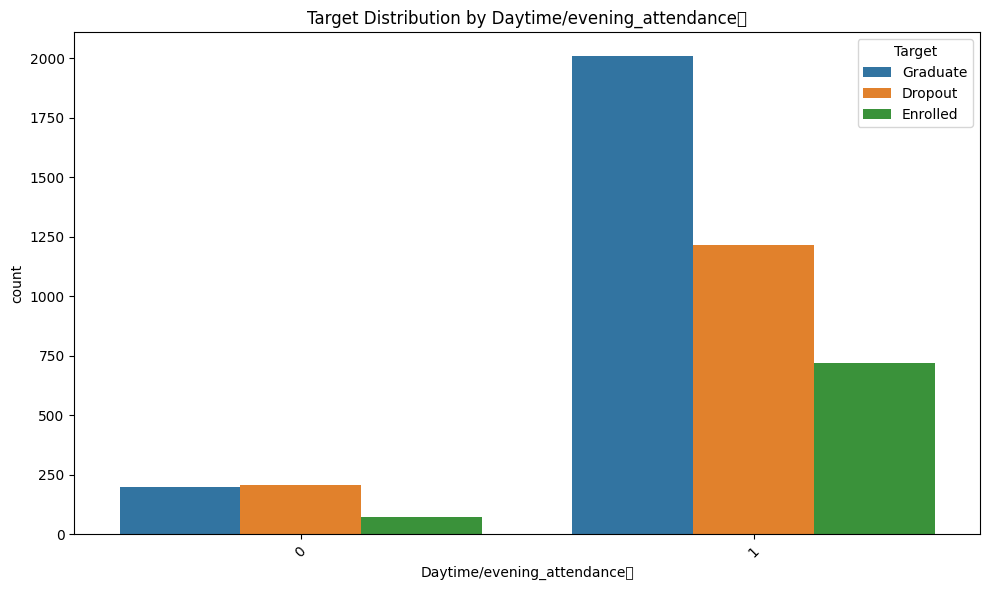

Chi-square Test → p-value: 0.0000

Feature: Nacionality
Unique values: 21


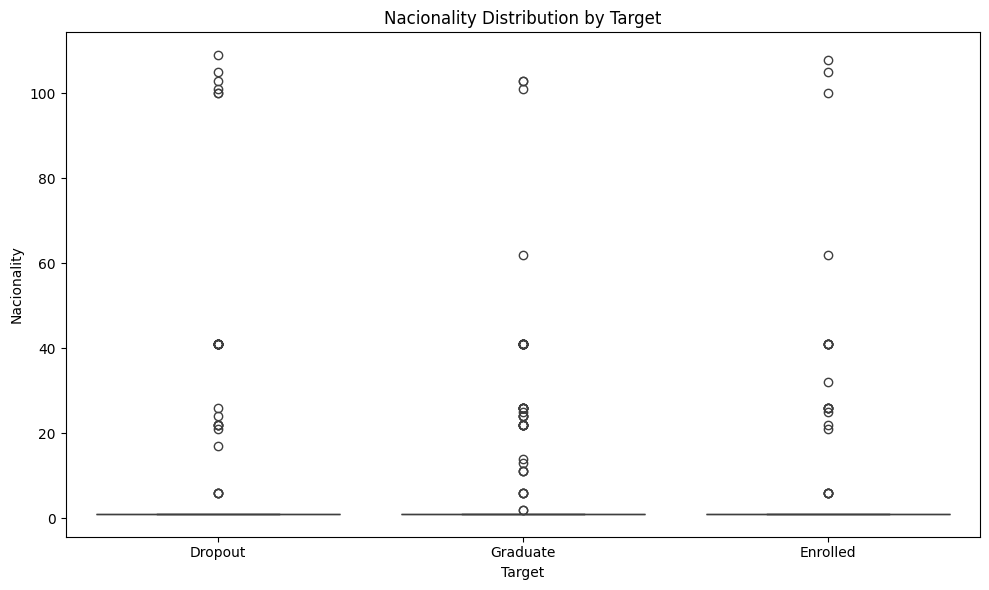

ANOVA Test → p-value: 0.4334

Feature: Mother's_qualification
Unique values: 29


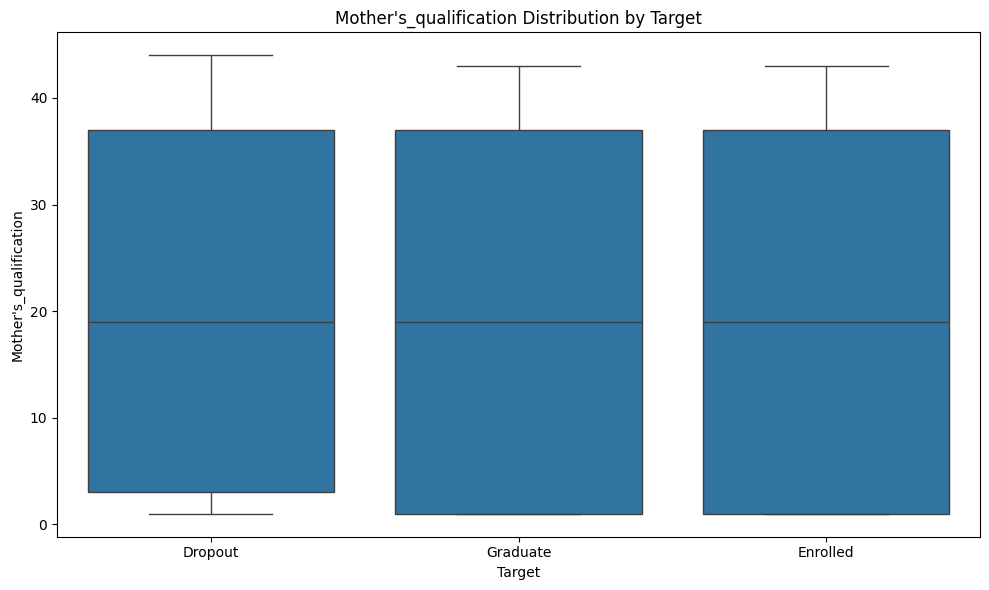

ANOVA Test → p-value: 0.0000

Feature: Father's_qualification
Unique values: 34


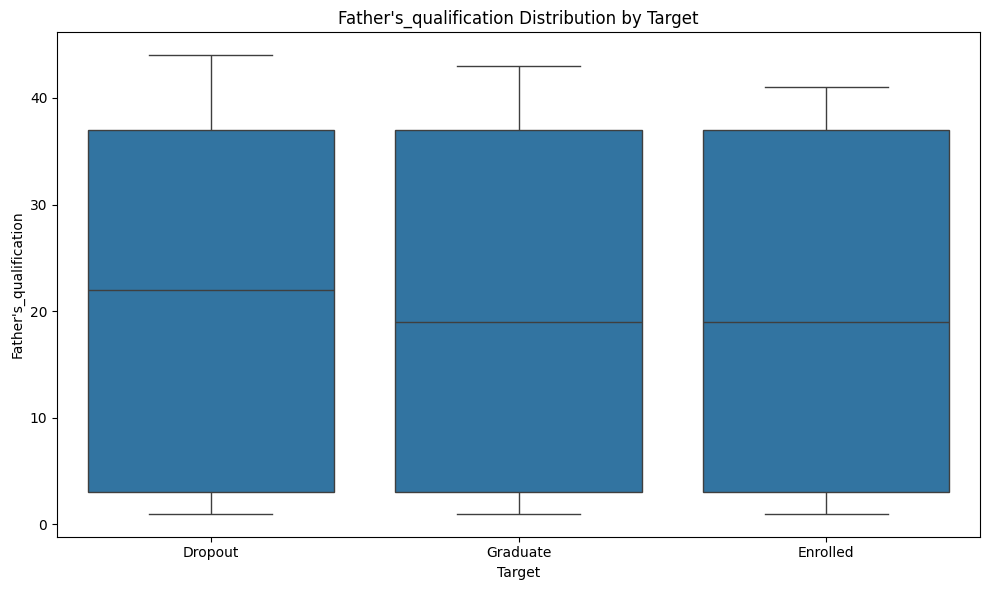

ANOVA Test → p-value: 0.0216

Feature: Mother's_occupation
Unique values: 32


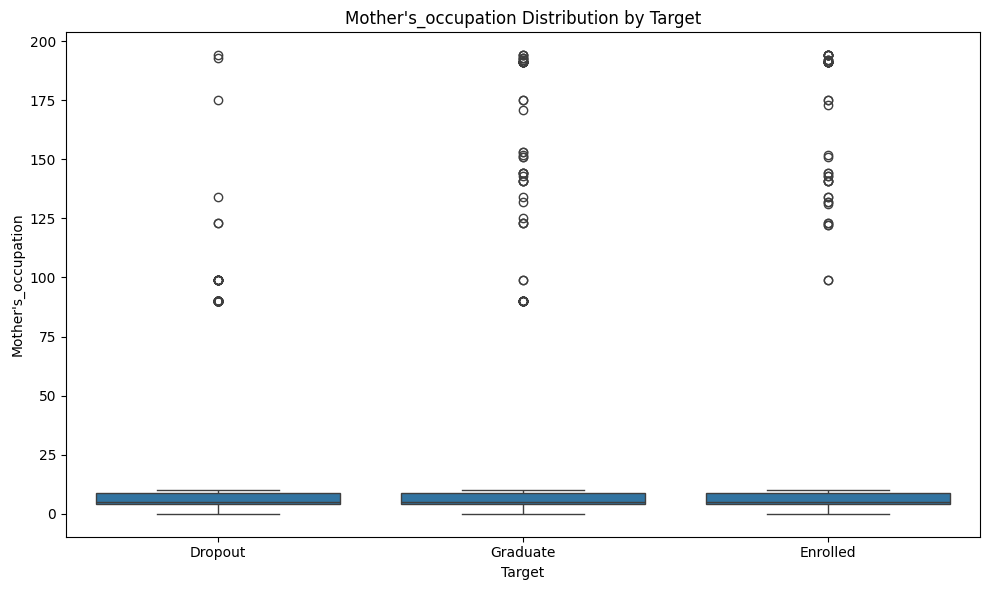

ANOVA Test → p-value: 0.0001

Feature: Father's_occupation
Unique values: 46


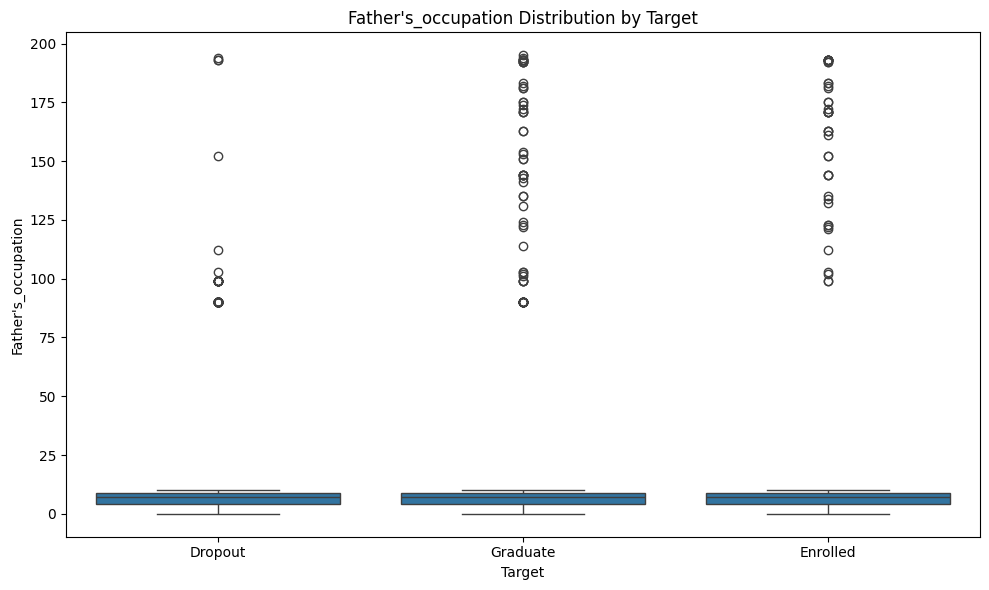

ANOVA Test → p-value: 0.0001

Feature: Displaced
Unique values: 2


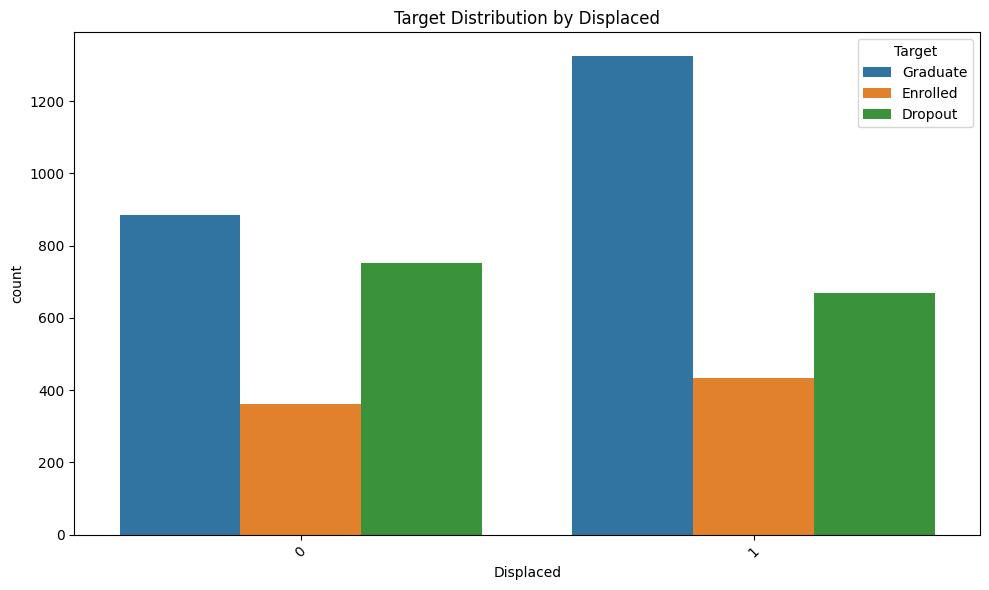

Chi-square Test → p-value: 0.0000

Feature: Educational_special_needs
Unique values: 2


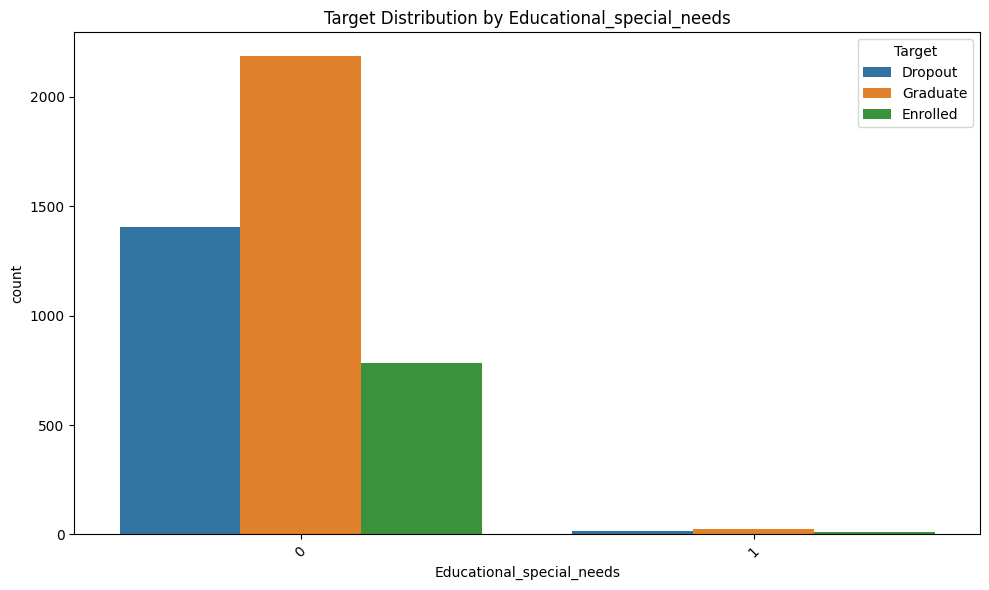

Chi-square Test → p-value: 0.7254

Feature: Gender
Unique values: 2


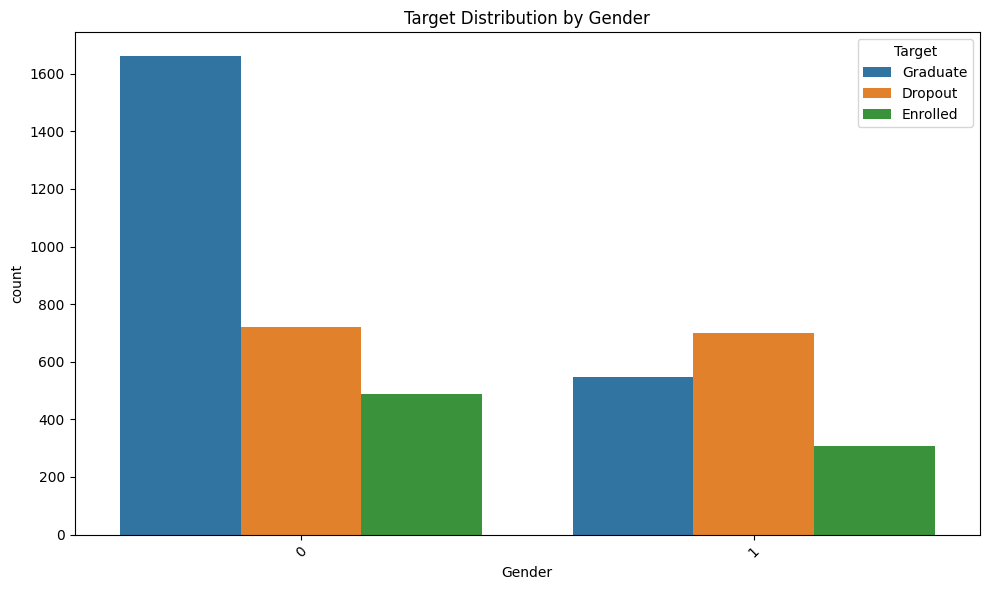

Chi-square Test → p-value: 0.0000

Feature: Age_at_enrollment
Unique values: 46


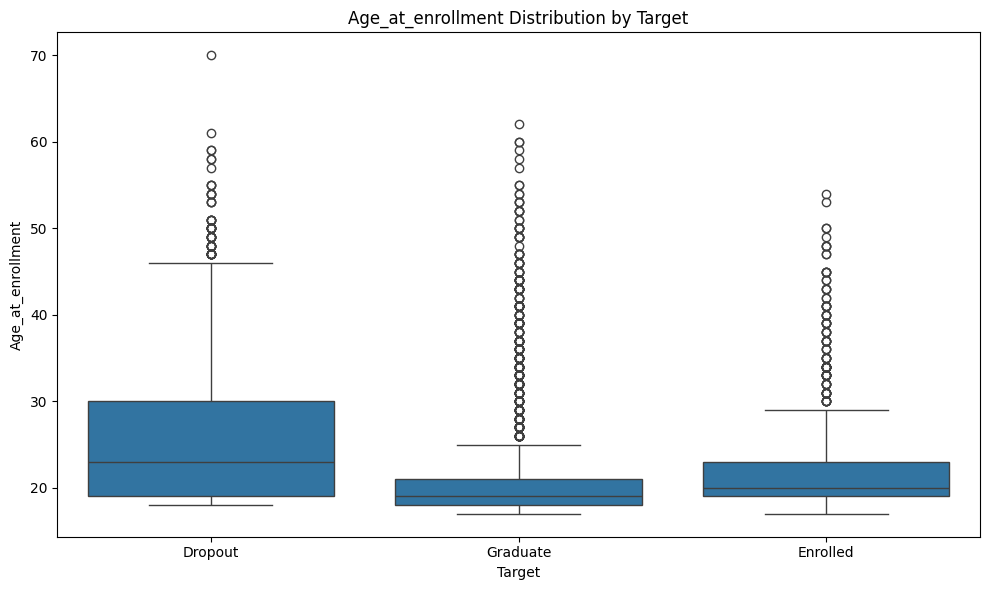

ANOVA Test → p-value: 0.0000

Feature: International
Unique values: 2


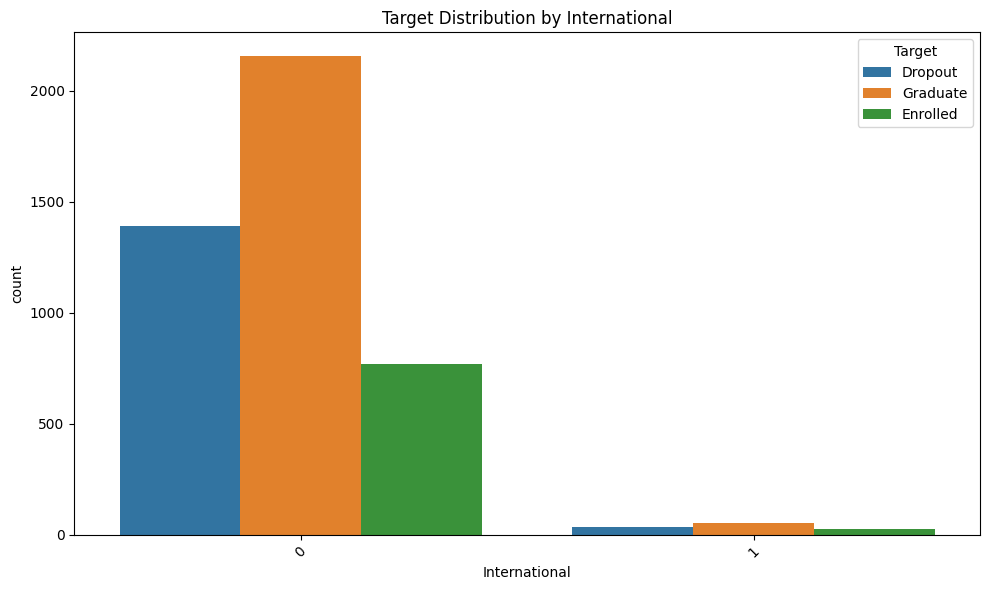

Chi-square Test → p-value: 0.5273

Summary of Demographic Analysis:


Feature         Type        Test       p-value
1               Application_mode  Categorical  Chi-square  1.964657e-77
12             Age_at_enrollment    Numerical       ANOVA  1.138849e-65
11                        Gender  Categorical  Chi-square  2.222480e-51
9                      Displaced  Categorical  Chi-square  2.876311e-13
0                 Marital_status  Categorical  Chi-square  8.054280e-10
2              Application_order  Categorical  Chi-square  2.272035e-09
3   Daytime/evening_attendance\t  Categorical  Chi-square  5.743834e-07
5         Mother's_qualification    Numerical       ANOVA  2.800636e-06
7            Mother's_occupation    Numerical       ANOVA  5.454285e-05
8            Father's_occupation    Numerical       ANOVA  1.298064e-04
6         Father's_qualification    Numerical       ANOVA  2.159831e-02
4                    Nacionality    Numerical       ANOVA  4.334070e-01
13                 International  Categorical  Chi-square  5.273144e-01
10     Educational_special_needs  Categorical  Chi-square  7.254050e-01

In [ ]:
# Demographic group
demographic_results = analyze_feature_group(dt, demographic_features, "Demographic", target='Target')


 Analyzing Financial Features 


Feature: Debtor
Unique values: 2


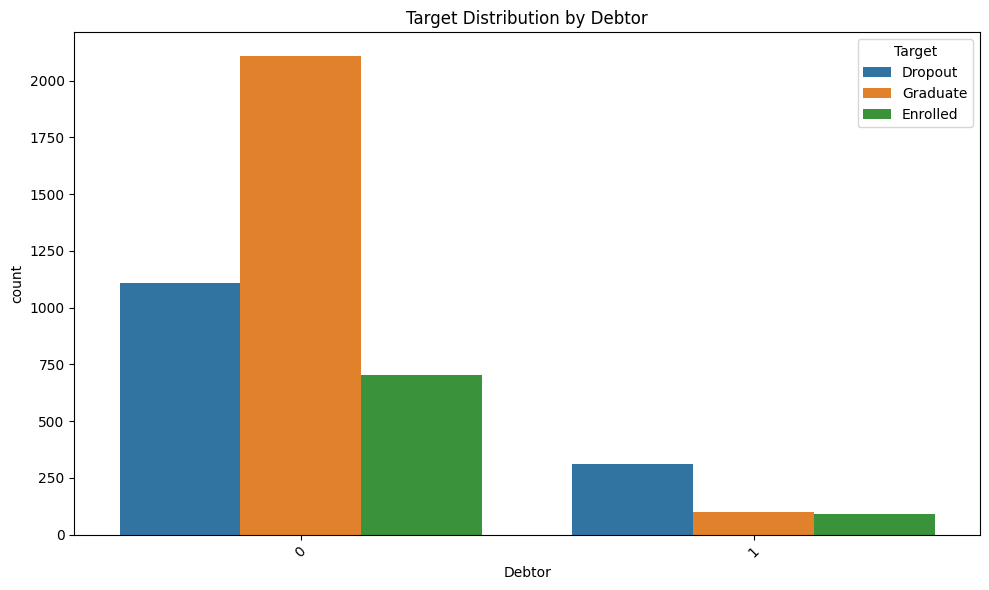

Chi-square Test → p-value: 0.0000

Feature: Tuition_fees_up_to_date
Unique values: 2


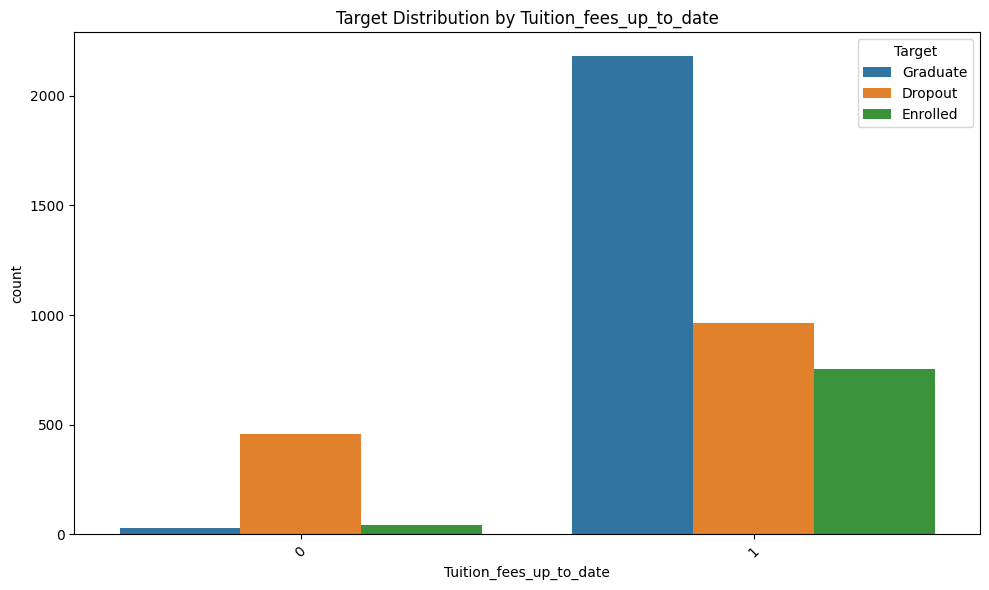

Chi-square Test → p-value: 0.0000

Feature: Scholarship_holder
Unique values: 2


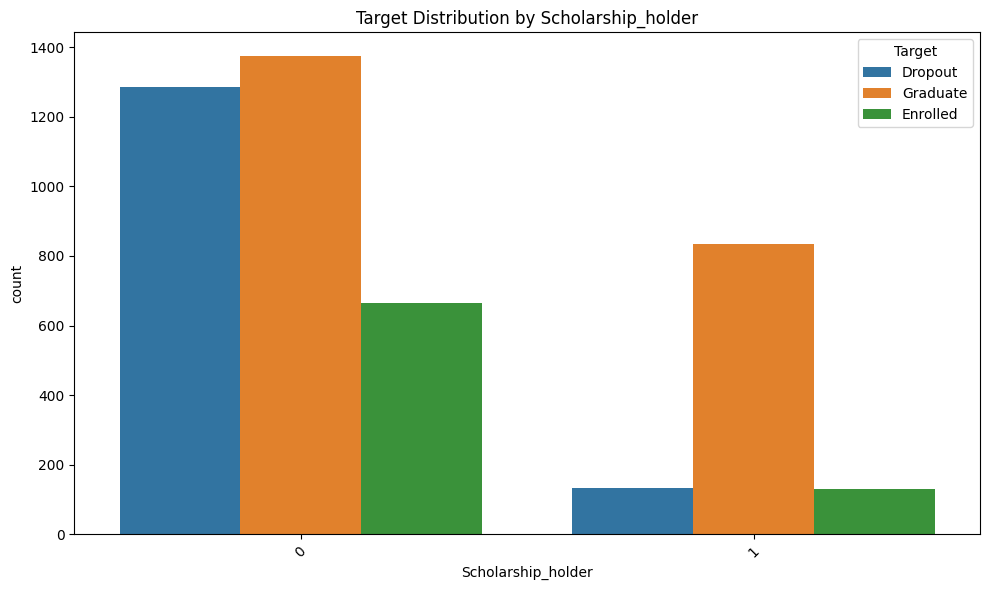

Chi-square Test → p-value: 0.0000

Feature: Unemployment_rate
Unique values: 10


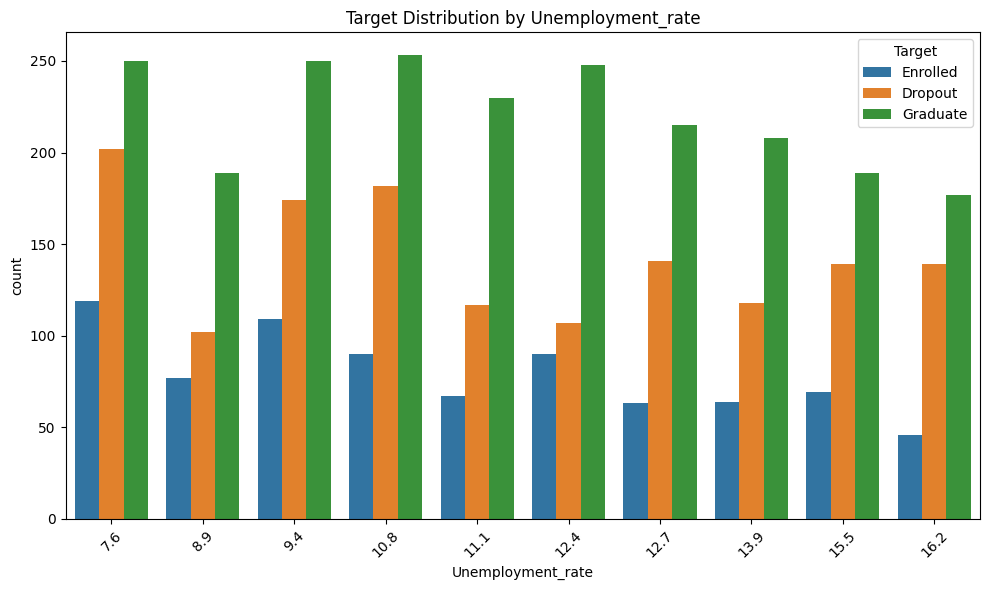

Chi-square Test → p-value: 0.0000

Feature: Inflation_rate
Unique values: 9


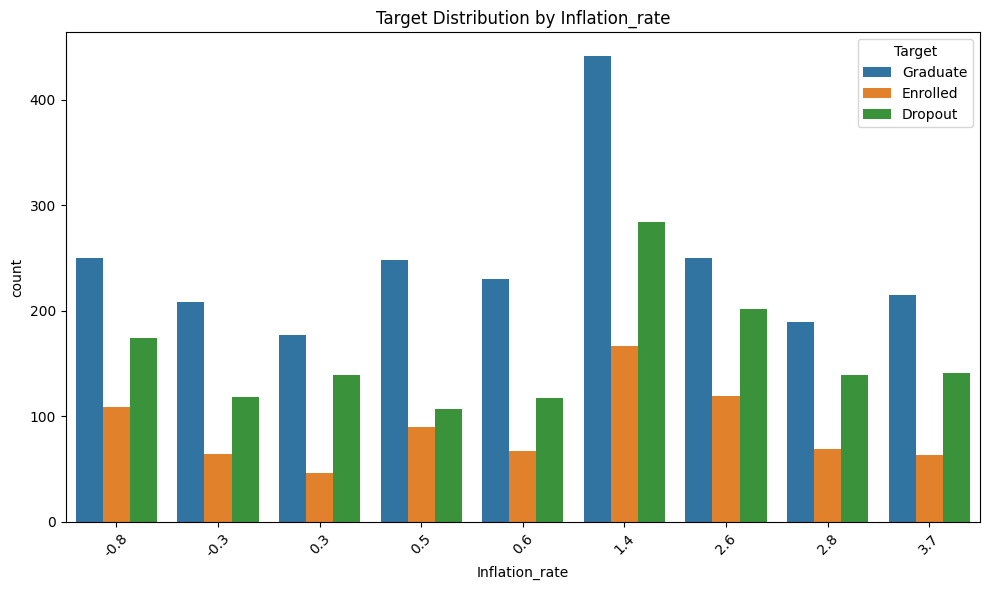

Chi-square Test → p-value: 0.0001

Feature: GDP
Unique values: 10


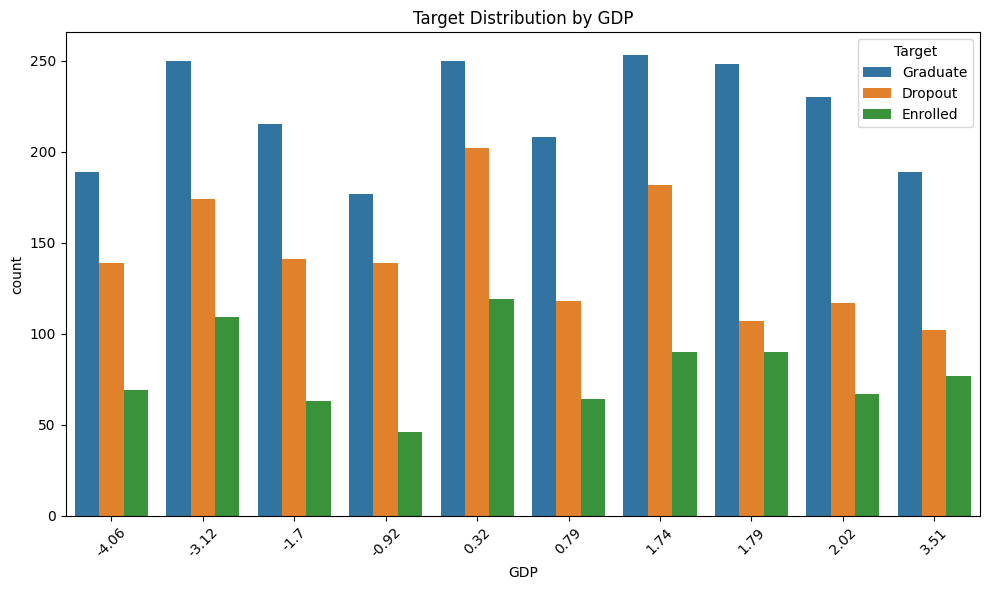

Chi-square Test → p-value: 0.0000

Summary of Financial Analysis:


Feature         Type        Test        p-value
1  Tuition_fees_up_to_date  Categorical  Chi-square  1.471628e-179
2       Scholarship_holder  Categorical  Chi-square   9.593930e-90
0                   Debtor  Categorical  Chi-square   4.858552e-57
5                      GDP  Categorical  Chi-square   3.788037e-05
3        Unemployment_rate  Categorical  Chi-square   3.788037e-05
4           Inflation_rate  Categorical  Chi-square   7.989953e-05

In [ ]:
# Financial group
financial_results = analyze_feature_group(dt, financial_features, "Financial", target='Target')

In [ ]:
# Combine results for comparison
all_results = pd.concat([academic_results, demographic_results, financial_results], ignore_index=True)
print(" Overall Summary of Feature-Target Relationships ")
display(all_results.sort_values(by='p-value'))

 Overall Summary of Feature-Target Relationships 


Feature         Type        Test  \
13             Curricular_units_2nd_sem_(approved)    Numerical       ANOVA   
14                Curricular_units_2nd_sem_(grade)    Numerical       ANOVA   
7              Curricular_units_1st_sem_(approved)    Numerical       ANOVA   
8                 Curricular_units_1st_sem_(grade)    Numerical       ANOVA   
31                         Tuition_fees_up_to_date  Categorical  Chi-square   
0                                           Course  Categorical  Chi-square   
32                              Scholarship_holder  Categorical  Chi-square   
17                                Application_mode  Categorical  Chi-square   
28                               Age_at_enrollment    Numerical       ANOVA   
30                                          Debtor  Categorical  Chi-square   
27                                          Gender  Categorical  Chi-square   
12          Curricular_units_2nd_sem_(evaluations)    Numerical       ANOVA   
11             Curricular_units_2nd_sem_(enrolled)    Numerical       ANOVA   
1                           Previous_qualification  Categorical  Chi-square   
5              Curricular_units_1st_sem_(enrolled)    Numerical       ANOVA   
6           Curricular_units_1st_sem_(evaluations)    Numerical       ANOVA   
3                                  Admission_grade    Numerical       ANOVA   
25                                       Displaced  Categorical  Chi-square   
2                   Previous_qualification_(grade)    Numerical       ANOVA   
16                                  Marital_status  Categorical  Chi-square   
18                               Application_order  Categorical  Chi-square   
19                    Daytime/evening_attendance\t  Categorical  Chi-square   
15  Curricular_units_2nd_sem_(without_evaluations)  Categorical  Chi-square   
21                          Mother's_qualification    Numerical       ANOVA   
9   Curricular_units_1st_sem_(without_evaluations)  Categorical  Chi-square   
35                                             GDP  Categorical  Chi-square   
33                               Unemployment_rate  Categorical  Chi-square   
23                             Mother's_occupation    Numerical       ANOVA   
34                                  Inflation_rate  Categorical  Chi-square   
24                             Father's_occupation    Numerical       ANOVA   
4              Curricular_units_1st_sem_(credited)    Numerical       ANOVA   
22                          Father's_qualification    Numerical       ANOVA   
10             Curricular_units_2nd_sem_(credited)  Categorical  Chi-square   
20                                     Nacionality    Numerical       ANOVA   
29                                   International  Categorical  Chi-square   
26                       Educational_special_needs  Categorical  Chi-square   

          p-value  
13   0.000000e+00  
14   0.000000e+00  
7   3.649472e-316  
8   2.803052e-269  
31  1.471628e-179  
0    2.316571e-97  
32   9.593930e-90  
17   1.964657e-77  
28   1.138849e-65  
30   4.858552e-57  
27   2.222480e-51  
12   4.039137e-38  
11   5.244430e-33  
1    7.160305e-30  
5    3.272852e-26  
6    6.897115e-17  
3    4.380466e-16  
25   2.876311e-13  
2    1.077783e-12  
16   8.054280e-10  
18   2.272035e-09  
19   5.743834e-07  
15   1.733032e-06  
21   2.800636e-06  
9    3.740211e-06  
35   3.788037e-05  
33   3.788037e-05  
23   5.454285e-05  
34   7.989953e-05  
24   1.298064e-04  
4    3.474158e-04  
22   2.159831e-02  
10   4.730393e-02  
20   4.334070e-01  
29   5.273144e-01  
26   7.254050e-01

Most features have extremely small p-values (e.g., 1e-100, 1e-200, or even 0.000000e+00), this means they are highly statistically significant and strongly associated with the target variable.

Examples:

Academic performance features like:Curricular_units_1st_sem_(approved), Curricular_units_2nd_sem_(grade)


Financial indicators like: Tuition_fees_up_to_date, Scholarship_holder


Demographic and administrative data like: Application_mode, Gender, Course


A few features have p-values above 0.05, indicating weak or no significant relationship with the target: Nacionality (0.433), International (0.527), Educational_special_needs (0.725)


These features likely don’t influence the outcome and will be dropped or used with caution during modeling.

In [ ]:
# Dropping these features
dt = dt.drop(['Nacionality', 'International', 'Educational_special_needs'], axis=1)

After identifying which features are significantly related to the target, we now need to check whether some of these numerical features are too similar to each other.

I will apply correlation matrix for numerical features to check pairwise linear relationships between those features. and also I will apply Variance Inflation Factor (VIF) multicollinearity across all features simultaneously, not just pairwise.

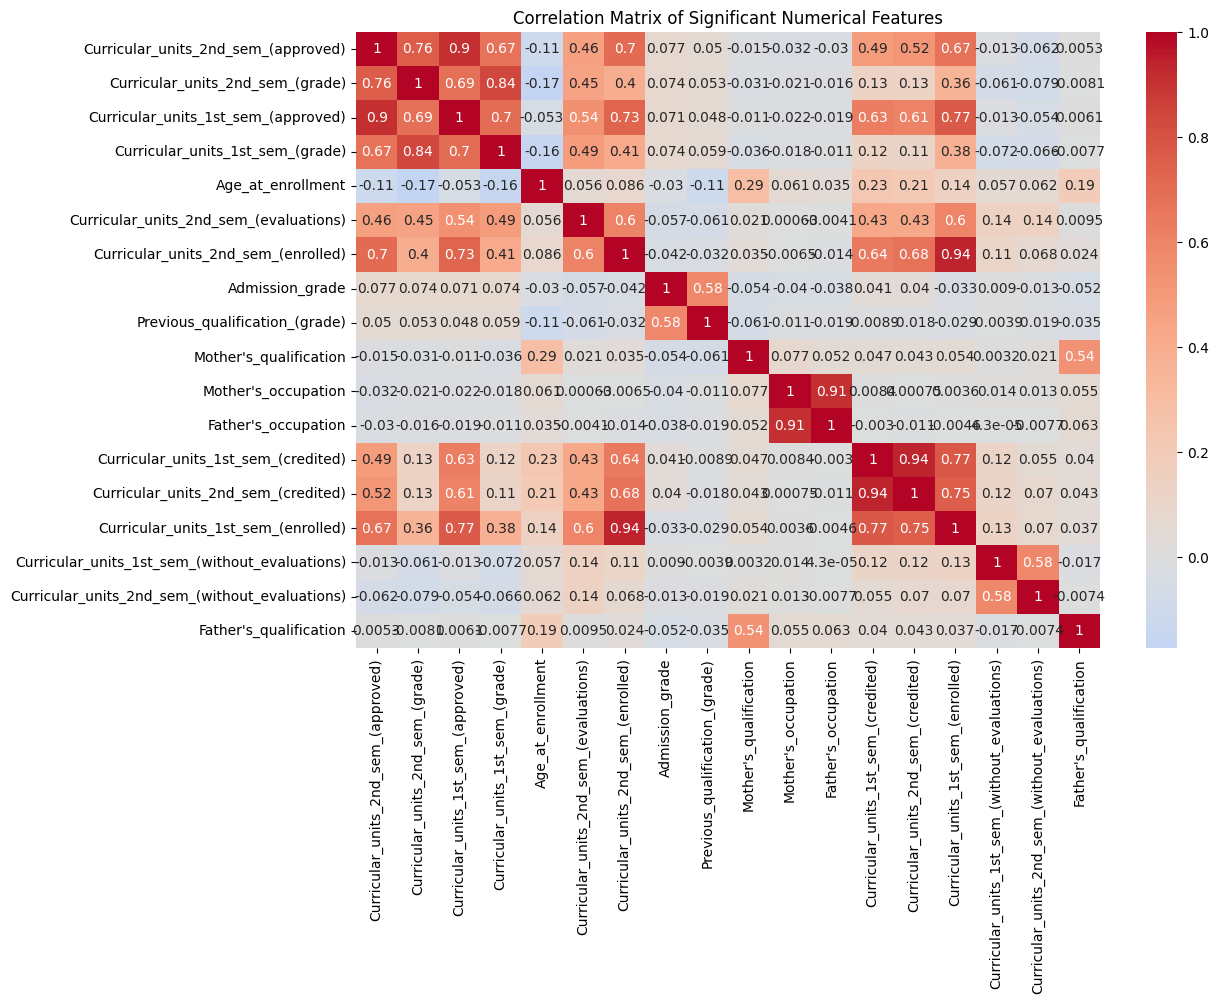

In [ ]:
num_features = [
    'Curricular_units_2nd_sem_(approved)',
    'Curricular_units_2nd_sem_(grade)',
    'Curricular_units_1st_sem_(approved)',
    'Curricular_units_1st_sem_(grade)',
    'Age_at_enrollment',
    'Curricular_units_2nd_sem_(evaluations)',
    'Curricular_units_2nd_sem_(enrolled)',
    'Admission_grade',
    'Previous_qualification_(grade)',
    'Mother\'s_qualification',
    'Mother\'s_occupation',
    'Father\'s_occupation',
    'Curricular_units_1st_sem_(credited)',
    'Curricular_units_2nd_sem_(credited)',
    'Curricular_units_1st_sem_(enrolled)',
    'Curricular_units_1st_sem_(without_evaluations)',
    'Curricular_units_2nd_sem_(without_evaluations)',
    'Father\'s_qualification'
]

# Compute correlation matrix
corr_matrix = dt[num_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Significant Numerical Features")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [variance_inflation_factor(dt[num_features].values, i)
                   for i in range(len(num_features))]

print(vif_data.sort_values(by='VIF', ascending=False))

                                           Feature         VIF
14             Curricular_units_1st_sem_(enrolled)  147.326315
6              Curricular_units_2nd_sem_(enrolled)  135.376140
8                   Previous_qualification_(grade)  116.489099
7                                  Admission_grade  109.623039
2              Curricular_units_1st_sem_(approved)   39.298371
0              Curricular_units_2nd_sem_(approved)   31.664411
3                 Curricular_units_1st_sem_(grade)   27.198155
1                 Curricular_units_2nd_sem_(grade)   26.185877
12             Curricular_units_1st_sem_(credited)   16.866733
13             Curricular_units_2nd_sem_(credited)   13.307654
4                                Age_at_enrollment   12.230523
5           Curricular_units_2nd_sem_(evaluations)   10.648124
11                             Father's_occupation    7.032693
10                             Mother's_occupation    6.952096
17                          Father's_qualification    4

Previous_qualification_(grade), Admission_grade, Curricular_units_1st_sem_(approved), Curricular_units_2nd_sem_(enrolled), Curricular_units_2nd_sem_(approved), Curricular_units_1st_sem_(grade), Curricular_units_2nd_sem_(grade), Curricular_units_1st_sem_(credited), Curricular_units_2nd_sem_(credited).

These features are highly collinear, probably because they measure overlapping aspects of academic performance.

After this I will combine these feature that shows high collinearity to avoid redudancy and increase interpetability and retains important information for predictive modeling.




In [ ]:
# Combine semester features:
# - Quantitative measures are summed to represent total academic activity.
# - Qualitative measures like grades are averaged to represent overall performance quality.

dt['Total_units_approved'] = dt['Curricular_units_1st_sem_(approved)'] + dt['Curricular_units_2nd_sem_(approved)']
dt['Average_grade'] = (dt['Curricular_units_1st_sem_(grade)'] + dt['Curricular_units_2nd_sem_(grade)']) / 2
dt['Total_units_enrolled'] = dt['Curricular_units_1st_sem_(enrolled)'] + dt['Curricular_units_2nd_sem_(enrolled)']
dt['Total_units_evaluated'] = dt['Curricular_units_1st_sem_(evaluations)'] + dt['Curricular_units_2nd_sem_(evaluations)']
dt['Total_units_credited'] = dt['Curricular_units_1st_sem_(credited)'] + dt['Curricular_units_2nd_sem_(credited)']

dt.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening_attendance\t  Previous_qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous_qualification_(grade)  Mother's_qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's_qualification  Mother's_occupation  ...  \
0                      12                    5  ...   
1                       3                    3  ...   
2                      37                    9  ...   
3                      37                    5  ...   
4                      38                    9  ...   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  Total_units_approved  Average_grade  \
0             1.4  1.74   Dropout                     0       0.000000   
1            -0.3  0.79  Graduate                    12      13.833333   
2             1.4  1.74   Dropout                     0       0.000000   
3            -0.8 -3.12  Graduate                    11      12.914286   
4            -0.3  0.79  Graduate                    11      12.666667   

   Total_units_enrolled  Total_units_evaluated  Total_units_credited  
0                     0                      0                     0  
1                    12                     12                     0  
2                    12                      0                     0  
3                    12                     18                     0  
4                    12                     15                     0  

[5 rows x 39 columns]

### **Rationale for Combining these features**

In the above cell, several academic features from the 1st and 2nd semesters
were found to be highly correlated and showed multicollinearity (high VIF values). To reduce redundancy while preserving meaningful information, I combined these semester-based variables into consolidated features that represent overall academic performance and engagement.

- Quantitative measures (number of approved, enrolled, credited, or evaluated units) were summed to represent total academic workload and achievement across both semesters.
- Qualitative measures (grades) were averaged to capture the student’s overall performance level without inflating values.

This transformation helps:
- Simplify the feature set and mitigate multicollinearity.
- Retain both quantity and quality signals of academic progress.
- Improve interpretability for subsequent modeling and feature importance analysis.

In [ ]:
# List of semester-specific columns to drop
semester_cols = [
    'Curricular_units_1st_sem_(credited)',
    'Curricular_units_1st_sem_(enrolled)',
    'Curricular_units_1st_sem_(evaluations)',
    'Curricular_units_1st_sem_(approved)',
    'Curricular_units_1st_sem_(grade)',
    'Curricular_units_1st_sem_(without_evaluations)',
    'Curricular_units_2nd_sem_(credited)',
    'Curricular_units_2nd_sem_(enrolled)',
    'Curricular_units_2nd_sem_(evaluations)',
    'Curricular_units_2nd_sem_(approved)',
    'Curricular_units_2nd_sem_(grade)',
    'Curricular_units_2nd_sem_(without_evaluations)'
]

# Drop redundant semester columns
dt_combined = dt.drop(columns=semester_cols)

dt_combined.head()


Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening_attendance\t  Previous_qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous_qualification_(grade)  Mother's_qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's_qualification  Mother's_occupation  ...  Age_at_enrollment  \
0                      12                    5  ...                 20   
1                       3                    3  ...                 19   
2                      37                    9  ...                 19   
3                      37                    5  ...                 20   
4                      38                    9  ...                 45   

   Unemployment_rate  Inflation_rate   GDP    Target  Total_units_approved  \
0               10.8             1.4  1.74   Dropout                     0   
1               13.9            -0.3  0.79  Graduate                    12   
2               10.8             1.4  1.74   Dropout                     0   
3                9.4            -0.8 -3.12  Graduate                    11   
4               13.9            -0.3  0.79  Graduate                    11   

   Average_grade  Total_units_enrolled  Total_units_evaluated  \
0       0.000000                     0                      0   
1      13.833333                    12                     12   
2       0.000000                    12                      0   
3      12.914286                    12                     18   
4      12.666667                    12                     15   

   Total_units_credited  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 27 columns]

I noticed that the target it is still a string base and needs to be changed.Since our target it is not encode I will encode so that it will be easier to do feature importance and correlation martix with it.

In [ ]:
new_df = dt_combined.copy()
new_df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening_attendance\t  Previous_qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous_qualification_(grade)  Mother's_qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's_qualification  Mother's_occupation  ...  Age_at_enrollment  \
0                      12                    5  ...                 20   
1                       3                    3  ...                 19   
2                      37                    9  ...                 19   
3                      37                    5  ...                 20   
4                      38                    9  ...                 45   

   Unemployment_rate  Inflation_rate   GDP    Target  Total_units_approved  \
0               10.8             1.4  1.74   Dropout                     0   
1               13.9            -0.3  0.79  Graduate                    12   
2               10.8             1.4  1.74   Dropout                     0   
3                9.4            -0.8 -3.12  Graduate                    11   
4               13.9            -0.3  0.79  Graduate                    11   

   Average_grade  Total_units_enrolled  Total_units_evaluated  \
0       0.000000                     0                      0   
1      13.833333                    12                     12   
2       0.000000                    12                      0   
3      12.914286                    12                     18   
4      12.666667                    12                     15   

   Total_units_credited  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 27 columns]

In [ ]:
# Encode target variable
new_df['Target'] = new_df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})
new_df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening_attendance\t  Previous_qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous_qualification_(grade)  Mother's_qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's_qualification  Mother's_occupation  ...  Age_at_enrollment  \
0                      12                    5  ...                 20   
1                       3                    3  ...                 19   
2                      37                    9  ...                 19   
3                      37                    5  ...                 20   
4                      38                    9  ...                 45   

   Unemployment_rate  Inflation_rate   GDP  Target  Total_units_approved  \
0               10.8             1.4  1.74       0                     0   
1               13.9            -0.3  0.79       1                    12   
2               10.8             1.4  1.74       0                     0   
3                9.4            -0.8 -3.12       1                    11   
4               13.9            -0.3  0.79       1                    11   

   Average_grade  Total_units_enrolled  Total_units_evaluated  \
0       0.000000                     0                      0   
1      13.833333                    12                     12   
2       0.000000                    12                      0   
3      12.914286                    12                     18   
4      12.666667                    12                     15   

   Total_units_credited  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 27 columns]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital_status                  4424 non-null   int64  
 1   Application_mode                4424 non-null   int64  
 2   Application_order               4424 non-null   int64  
 3   Course                          4424 non-null   int64  
 4   Daytime/evening_attendance	     4424 non-null   int64  
 5   Previous_qualification          4424 non-null   int64  
 6   Previous_qualification_(grade)  4424 non-null   float64
 7   Mother's_qualification          4424 non-null   int64  
 8   Father's_qualification          4424 non-null   int64  
 9   Mother's_occupation             4424 non-null   int64  
 10  Father's_occupation             4424 non-null   int64  
 11  Admission_grade                 4424 non-null   float64
 12  Displaced                       44

In [ ]:
new_df['Target'].unique()

array([0, 1, 2])

In [ ]:
new_df['Target'].value_counts()

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

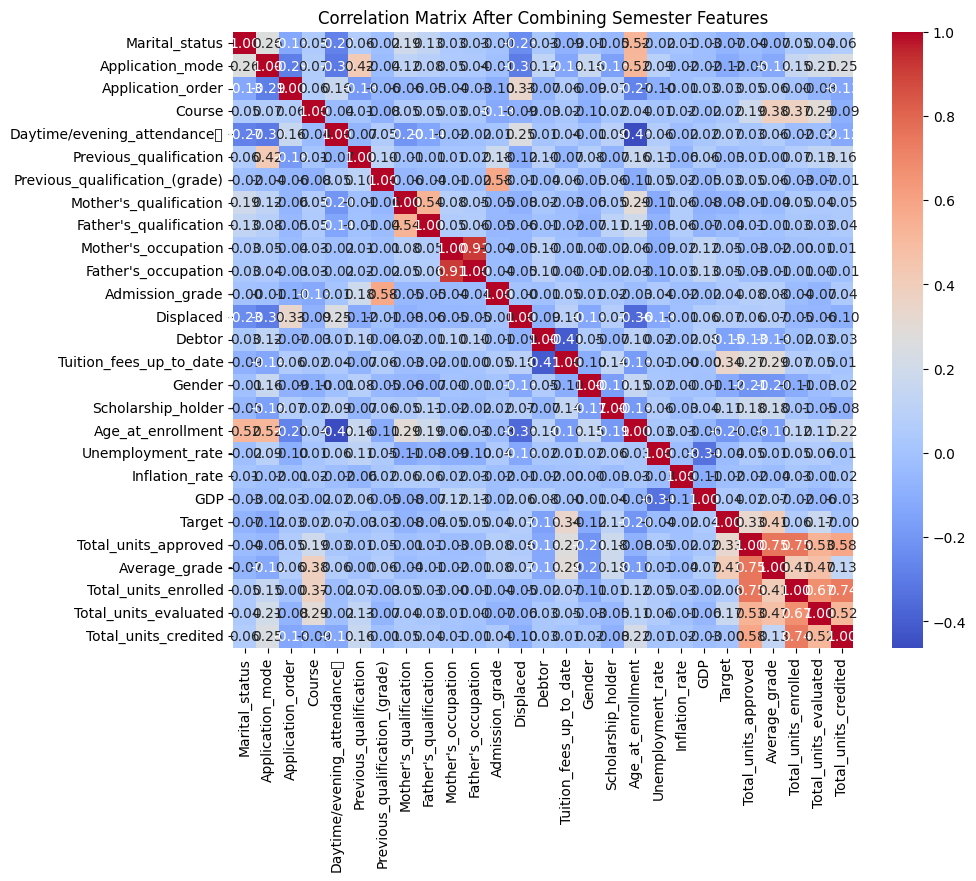

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix After Combining Semester Features")
plt.show()

In [ ]:
# Sorting feature by absolute correlation with "Target"
corr_matrix = new_df.corr()
features = corr_matrix['Target'].abs().sort_values(ascending=False)
print(features)

Target                            1.000000
Average_grade                     0.407816
Tuition_fees_up_to_date           0.342121
Total_units_approved              0.328267
Age_at_enrollment                 0.201806
Total_units_evaluated             0.168438
Debtor                            0.154802
Gender                            0.118454
Application_mode                  0.116928
Scholarship_holder                0.114517
Mother's_qualification            0.075941
Marital_status                    0.074310
Displaced                         0.070649
Daytime/evening_attendance\t      0.066439
Total_units_enrolled              0.056901
Mother's_occupation               0.051664
Father's_occupation               0.051455
Admission_grade                   0.038716
Unemployment_rate                 0.037279
GDP                               0.037052
Father's_qualification            0.035183
Previous_qualification            0.027984
Application_order                 0.027393
Previous_qu

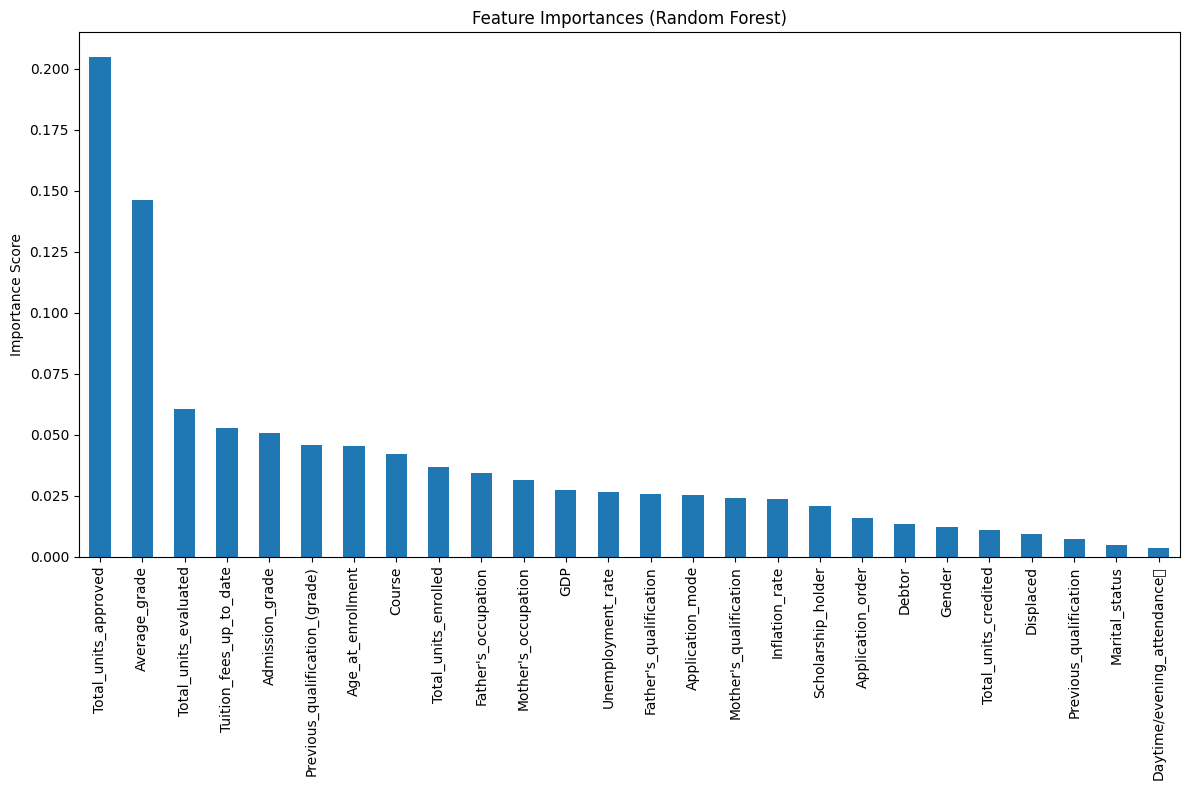

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Separate features (X) and target (y)
X = new_df.drop('Target', axis=1)
y = new_df['Target']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Initialize a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [ ]:
len(shap_values)

4424

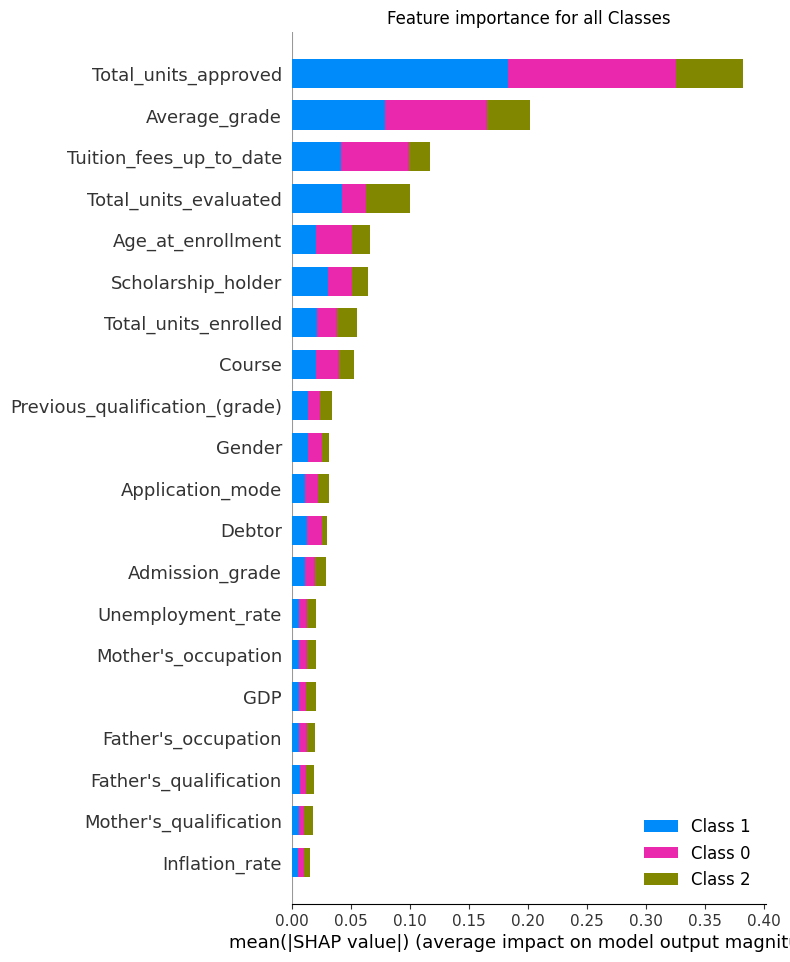

In [ ]:
# Example: SHAP summary plot for all classes
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("Feature importance for all Classes")
plt.show()

Based on the correlation matrix, feature importance insights, SHAP interpretation and other analysis conducted from above I decided to keep the following:


- Total_units_approved
- Average_grade
- age_at_enrollment
- Tuition_fees_up_to_date
- Total_units_evaluated
- Scholarship_holder
- Total_units_enrolled
- Debtor
- Gender
- previous_qualification_(grades)



In [ ]:
# We drop the remaining feature and leave the important ones
selected_features = [
    'Total_units_approved',
    'Average_grade',
    'Age_at_enrollment',
    'Tuition_fees_up_to_date',
    'Total_units_evaluated',
    'Scholarship_holder',
    'Total_units_enrolled',
    'Debtor',
    'Gender',
    'Previous_qualification_(grade)',
    'Target'
]

selected_df = new_df[selected_features].copy()
selected_df.head()

Total_units_approved  Average_grade  Age_at_enrollment  \
0                     0       0.000000                 20   
1                    12      13.833333                 19   
2                     0       0.000000                 19   
3                    11      12.914286                 20   
4                    11      12.666667                 45   

   Tuition_fees_up_to_date  Total_units_evaluated  Scholarship_holder  \
0                        1                      0                   0   
1                        0                     12                   0   
2                        0                      0                   0   
3                        1                     18                   0   
4                        1                     15                   0   

   Total_units_enrolled  Debtor  Gender  Previous_qualification_(grade)  \
0                     0       0       1                           122.0   
1                    12       0       1                           160.0   
2                    12       0       1                           122.0   
3                    12       0       0                           122.0   
4                    12       0       0                           100.0   

   Target  
0       0  
1       1  
2       0  
3       1  
4       1

In [ ]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total_units_approved            4424 non-null   int64  
 1   Average_grade                   4424 non-null   float64
 2   Age_at_enrollment               4424 non-null   int64  
 3   Tuition_fees_up_to_date         4424 non-null   int64  
 4   Total_units_evaluated           4424 non-null   int64  
 5   Scholarship_holder              4424 non-null   int64  
 6   Total_units_enrolled            4424 non-null   int64  
 7   Debtor                          4424 non-null   int64  
 8   Gender                          4424 non-null   int64  
 9   Previous_qualification_(grade)  4424 non-null   float64
 10  Target                          4424 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 380.3 KB


## **Data Preprocessing & Feature Engineering**

### **Applying Transformations**

We will apply necessary transformations to the features, such as encoding categorical variables and scaling numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = selected_df.drop('Target', axis=1)
y = selected_df['Target']

# Identify numerical and categorical features
num_features = ['Total_units_approved', 'Average_grade', 'Age_at_enrollment',
                    'Total_units_evaluated', 'Total_units_enrolled', 'Previous_qualification_(grade)']

binary_features = ['Tuition_fees_up_to_date', 'Scholarship_holder', 'Debtor', 'Gender']

# Scale numeric features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [ ]:
selected_df.head()

Total_units_approved  Average_grade  Age_at_enrollment  \
0                     0       0.000000                 20   
1                    12      13.833333                 19   
2                     0       0.000000                 19   
3                    11      12.914286                 20   
4                    11      12.666667                 45   

   Tuition_fees_up_to_date  Total_units_evaluated  Scholarship_holder  \
0                        1                      0                   0   
1                        0                     12                   0   
2                        0                      0                   0   
3                        1                     18                   0   
4                        1                     15                   0   

   Total_units_enrolled  Debtor  Gender  Previous_qualification_(grade)  \
0                     0       0       1                           122.0   
1                    12       0       1                           160.0   
2                    12       0       1                           122.0   
3                    12       0       0                           122.0   
4                    12       0       0                           100.0   

   Target  
0       0  
1       1  
2       0  
3       1  
4       1

In [ ]:
# Combine scaled numerical features and binary features back into a single DataFrame
X_preprocessed = X.copy()

# Add the target variable back to the preprocessed DataFrame
X_preprocessed['Target'] = y

# Display the head of the preprocessed DataFrame
print("Preprocessed DataFrame:")
display(X_preprocessed.head())

Preprocessed DataFrame:


Total_units_approved  Average_grade  Age_at_enrollment  \
0             -1.533977      -2.165950          -0.430363   
1              0.479467       0.705237          -0.562168   
2             -1.533977      -2.165950          -0.562168   
3              0.311680       0.514483          -0.430363   
4              0.311680       0.463088           2.864765   

   Tuition_fees_up_to_date  Total_units_evaluated  Scholarship_holder  \
0                        1              -2.134928                   0   
1                        0              -0.569190                   0   
2                        0              -2.134928                   0   
3                        1               0.213679                   0   
4                        1              -0.177756                   0   

   Total_units_enrolled  Debtor  Gender  Previous_qualification_(grade)  \
0             -2.713086       0       1                       -0.804841   
1             -0.109088       0       1                        2.076819   
2             -0.109088       0       1                       -0.804841   
3             -0.109088       0       0                       -0.804841   
4             -0.109088       0       0                       -2.473171   

   Target  
0       0  
1       1  
2       0  
3       1  
4       1

No Feature engineering done because the preprocessed data was ready to be trained with meaningful features that will make our model perform as we want considering all the analysis and preprocess was done.

Now the next step is to separate feature for training and testing.

In [ ]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
X = X_preprocessed.drop('Target', axis=1)
y = X_preprocessed['Target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Implementation & Optimization**



## **First Trail - multi classification**

### **Neural Network Model**

Implementing training for neural network model

In [ ]:
# Define the neural network
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
import numpy as np

def define_model(x_train,
                            y_train,
                            optimization="adam",
                            regularization_datatype=None,
                            regularization_rate=0.001,
                            early_stopping=True,
                            dropout=0.3,
                            learning_rate=0.001,
                            batch_normalization=True,
                            validation_split=0.2,
                            epochs=150,
                            batch_size=32,
                            verbose=2,
                            patience=10,
                            use_smote=False,
                            use_class_weight=False):

  # Apply SMOTE if enabled
  if use_smote:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

  # Encode target for multiclass softmax
  num_classes = len(np.unique(y_train))
  y_train_encoded = to_categorical(y_train, num_classes=num_classes)

  # Compute class weights if enabled
  class_weights = None
  if use_class_weight:
      unique_classes = np.unique(y_train)
      class_weights_array = compute_class_weight('balanced', classes=unique_classes, y=y_train)
      class_weights = {i: class_weights_array[i] for i in range(len(unique_classes))}

  # Regularization setup
  if regularization_datatype == 'l1':
      regularizer = regularizers.l1(regularization_rate)
  elif regularization_datatype == 'l2':
      regularizer = regularizers.l2(regularization_rate)
  else:
      regularizer = None

  # Define network
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizer))
  if batch_normalization: model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
  if batch_normalization: model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
  if batch_normalization: model.add(BatchNormalization())
  model.add(Dropout(dropout / 2))

  # Output layer
  model.add(Dense(num_classes, activation='softmax'))

  # Optimizer selection
  if optimization == 'adam':
      optimizer = Adam(learning_rate=learning_rate)
  elif optimization == 'rmsprop':
      optimizer = RMSprop(learning_rate=learning_rate)
  elif optimization == 'sgd':
      optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
  else:
      optimizer = Adam(learning_rate=learning_rate)

  # Compile
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Early stopping
  callbacks = [EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)] if early_stopping else []

  # Train
  history = model.fit(x_train, y_train_encoded,
                      validation_split=validation_split,
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=callbacks,
                      verbose=verbose,
                      class_weight=class_weights)

  return model, history


In [ ]:
# Curve function
def loss_curve_plot(history):
  epochs = range(1, len(history.history['loss']) + 1)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Computing metrics
    # Use zero_division parameter to handle cases where a class has no predicted samples
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    # Define labels based on your target encoding
    target_labels = ['Dropout', 'Graduate', 'Enrolled']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### **Train & optimization fot the Neural Network Model**

Epoch 1/100
89/89 - 9s - 106ms/step - accuracy: 0.6213 - loss: 0.9553 - val_accuracy: 0.7260 - val_loss: 0.7985
Epoch 2/100
89/89 - 0s - 5ms/step - accuracy: 0.6980 - loss: 0.7639 - val_accuracy: 0.7345 - val_loss: 0.6871
Epoch 3/100
89/89 - 0s - 5ms/step - accuracy: 0.7100 - loss: 0.7273 - val_accuracy: 0.7486 - val_loss: 0.6287
Epoch 4/100
89/89 - 1s - 8ms/step - accuracy: 0.7171 - loss: 0.6832 - val_accuracy: 0.7528 - val_loss: 0.6177
Epoch 5/100
89/89 - 0s - 4ms/step - accuracy: 0.7298 - loss: 0.6687 - val_accuracy: 0.7472 - val_loss: 0.6064
Epoch 6/100
89/89 - 0s - 4ms/step - accuracy: 0.7259 - loss: 0.6668 - val_accuracy: 0.7585 - val_loss: 0.5983
Epoch 7/100
89/89 - 0s - 4ms/step - accuracy: 0.7421 - loss: 0.6407 - val_accuracy: 0.7641 - val_loss: 0.6035
Epoch 8/100
89/89 - 0s - 4ms/step - accuracy: 0.7368 - loss: 0.6375 - val_accuracy: 0.7585 - val_loss: 0.6009
Epoch 9/100
89/89 - 0s - 4ms/step - accuracy: 0.7492 - loss: 0.6191 - val_accuracy: 0.7641 - val_loss: 0.5990
Epoch 10

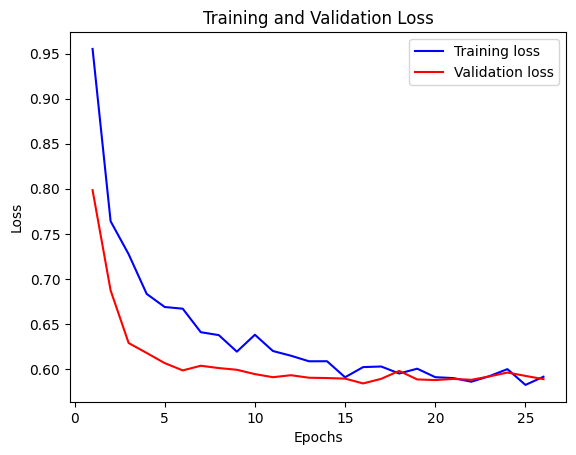

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       316
           1       0.77      0.94      0.84       418
           2       0.50      0.30      0.37       151

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.77      0.75       885



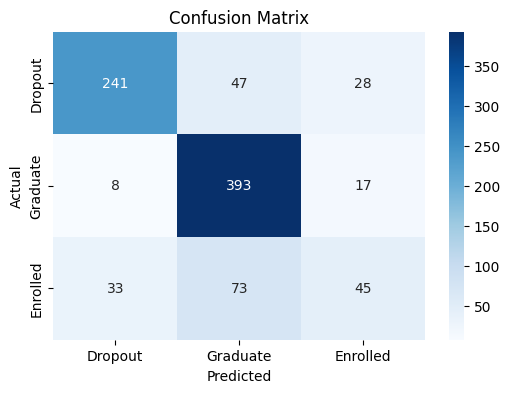

In [ ]:
model_1, history_1 = define_model(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
loss_curve_plot(history_1)
evaluate_model(model_1, x_test, y_test)

Epoch 1/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.3823 - loss: 1.4620 - val_accuracy: 0.2825 - val_loss: 1.1094
Epoch 2/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5108 - loss: 1.0890 - val_accuracy: 0.4195 - val_loss: 1.0448
Epoch 3/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5901 - loss: 0.9415 - val_accuracy: 0.5381 - val_loss: 0.9717
Epoch 4/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6073 - loss: 0.9094 - val_accuracy: 0.6144 - val_loss: 0.8868
Epoch 5/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6264 - loss: 0.8649 - val_accuracy: 0.6469 - val_loss: 0.8204
Epoch 6/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6571 - loss: 0.7865 - val_accuracy: 0.6737 - val_loss: 0.7516
Epoch 7/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6715 - loss: 0.8035 - val_accuracy: 0.6921 - val_loss: 0.7039
Epoch 8/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 0.7593 - val_accuracy: 0.7076 - 

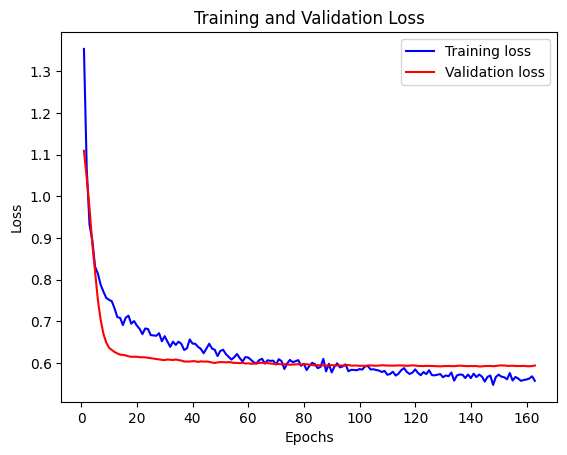

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       316
           1       0.77      0.94      0.84       418
           2       0.52      0.34      0.41       151

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.76      0.77      0.75       885



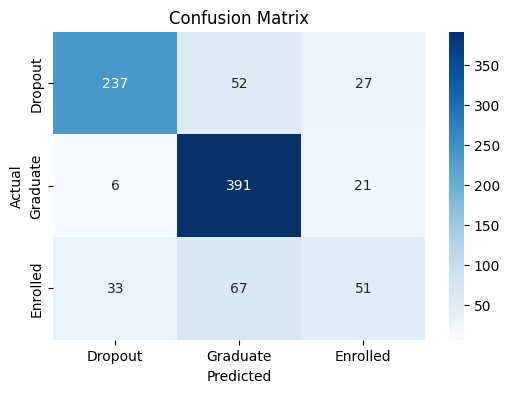

In [ ]:
model_2, history_2 = define_model(x_train, y_train, optimization='adam', early_stopping=True, dropout=0.2, batch_size=64, epochs=300,learning_rate=0.0001, batch_normalization=True, verbose=1, patience=20)
loss_curve_plot(history_2)
evaluate_model(model_2, x_test, y_test)

Epoch 1/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.3489 - loss: 3.5654 - val_accuracy: 0.6215 - val_loss: 2.9080
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4183 - loss: 3.2589 - val_accuracy: 0.6568 - val_loss: 2.8370
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4577 - loss: 3.1639 - val_accuracy: 0.6695 - val_loss: 2.7769
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 3.0576 - val_accuracy: 0.6907 - val_loss: 2.7180
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5106 - loss: 3.0678 - val_accuracy: 0.6850 - val_loss: 2.6689
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5718 - loss: 2.9601 - val_accuracy: 0.7034 - val_loss: 2.6251
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5567 - loss: 2.9365 - val_accuracy: 0.7048 - val_loss: 2.5853
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5443 - loss: 2.9518 - val_accuracy: 0.6963 - 

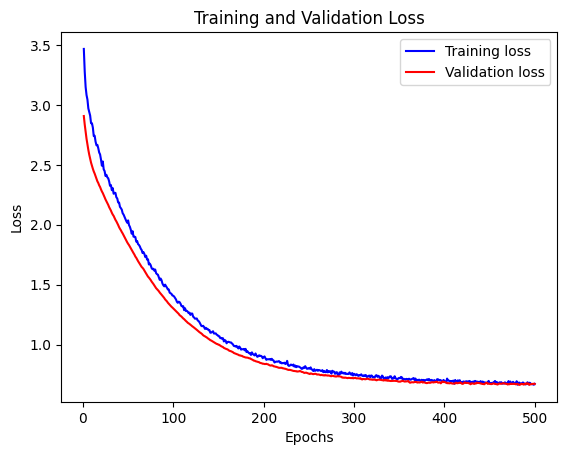

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       316
           1       0.83      0.83      0.83       418
           2       0.41      0.58      0.48       151

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.77      0.73      0.74       885



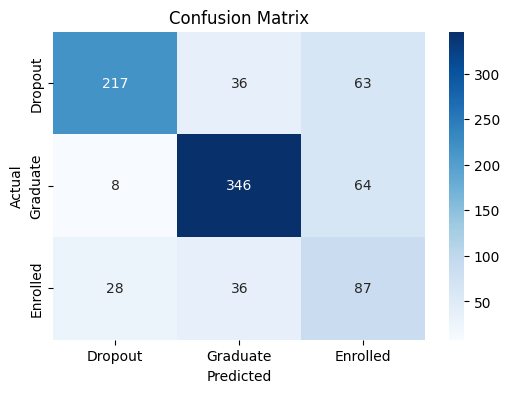

In [ ]:
model_3, history_3 = define_model(x_train, y_train, optimization='rmsprop', use_class_weight=True, early_stopping=True, dropout=0.4, batch_size=64, epochs=500,learning_rate=0.0001, regularization_datatype='l2', regularization_rate=0.01, batch_normalization=True, verbose=1, patience=30)
loss_curve_plot(history_3)
evaluate_model(model_3, x_test, y_test)

### **Random Forest Model**

Implementing training for Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score
from tensorflow.keras.utils import to_categorical
# Assuming X and y are already defined and preprocessed as needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


print(f"Training set shape (features): {X_train.shape}")
print(f"Training set shape (target): {y_train.shape}")
print(f"Validation set shape (features): {X_val.shape}")
print(f"Validation set shape (target): {y_val.shape}")
print(f"Testing set shape (features): {X_test.shape}")
print(f"Testing set shape (target): {y_test.shape}")


# Define a function for training and validating a model
def train_and_validate_model(model, X_train, y_train, X_val, y_val, model_name):
    """Trains a model and performs validation."""
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred_val)
    balanced_acc = balanced_accuracy_score(y_val, y_pred_val)

    # For AUC in multiclass, we need the probability predictions
    y_pred_proba_val = model.predict_proba(X_val)
    auc_score = roc_auc_score(y_val, y_pred_proba_val, multi_class='ovr', average='weighted')


    print(f"\n{model_name} Validation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Weighted AUC: {auc_score:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred_val, zero_division=0)}")

    return model, y_pred_val


Training set shape (features): (3096, 10)
Training set shape (target): (3096,)
Validation set shape (features): (664, 10)
Validation set shape (target): (664,)
Testing set shape (features): (664, 10)
Testing set shape (target): (664,)


In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, y_pred_val_rf = train_and_validate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")


Random Forest Validation Metrics:
Accuracy: 0.7425
Balanced Accuracy: 0.6535
Weighted AUC: 0.8792
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       213
           1       0.78      0.91      0.84       332
           2       0.46      0.35      0.40       119

    accuracy                           0.74       664
   macro avg       0.68      0.65      0.66       664
weighted avg       0.73      0.74      0.73       664



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [1, 0.5, 0.75]
}


# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1, verbose=1)

print("Performing Grid Search for Random Forest...")
grid_search.fit(X_train, y_train)

print("Best parameters found for Random Forest: ", grid_search.best_params_)
print("Best cross-validation weighted AUC: ", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_


Performing Grid Search for Random Forest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found for Random Forest:  {'max_depth': 10, 'max_samples': 0.75, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation weighted AUC:  0.8959505426610448


### **Decision Tree Model**

Implementing desicion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier with default parameters
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, y_pred_val_dt = train_and_validate_model(dt_model, X_train, y_train, X_val, y_val, "Decision Tree")


Decision Tree Validation Metrics:
Accuracy: 0.6611
Balanced Accuracy: 0.6109
Weighted AUC: 0.7372
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       213
           1       0.78      0.75      0.76       332
           2       0.40      0.43      0.41       119

    accuracy                           0.66       664
   macro avg       0.61      0.61      0.61       664
weighted avg       0.67      0.66      0.66       664



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                              cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
print("Performing Grid Search for Decision Tree...")
dt_grid_search.fit(X_train, y_train)

print("\nBest parameters found for Decision Tree: ", dt_grid_search.best_params_)
print("Best cross-validation weighted AUC for Decision Tree: ", dt_grid_search.best_score_)

best_dt_model = dt_grid_search.best_estimator_


Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters found for Decision Tree:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation weighted AUC for Decision Tree:  0.8471443764358547


### **XGBoost Model**

Implementing XGBoost Model

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost Classifier with default parameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model, y_pred_val_xgb = train_and_validate_model(xgb_model, X_train, y_train, X_val, y_val, "XGBoost")


XGBoost Validation Metrics:
Accuracy: 0.7440
Balanced Accuracy: 0.6562
Weighted AUC: 0.8789
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       213
           1       0.80      0.91      0.85       332
           2       0.44      0.35      0.39       119

    accuracy                           0.74       664
   macro avg       0.67      0.66      0.66       664
weighted avg       0.73      0.74      0.73       664



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize a base XGBoost model for the grid search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1, verbose=1)

print("\nPerforming Grid Search for XGBoost...")
xgb_grid_search.fit(X_train, y_train)

print("\nBest parameters found for XGBoost: ", xgb_grid_search.best_params_)
print("Best cross-validation weighted AUC for XGBoost: ", xgb_grid_search.best_score_)

best_xgb_model = xgb_grid_search.best_estimator_



Performing Grid Search for XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found for XGBoost:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation weighted AUC for XGBoost:  0.8972692610090117


### **Experiment / Result Table**

| Experiment | Model | Accuracy | Precision | Recall | F1-Score |AUC |
|---|---|---|---|---|---|---|
| Experiment 1 | Random Forest | 0.74 |  0=0.80, 1=0.78, 2=0.46| 0=0.69, 1=0.91, 2=0.35 | 0=0.74, 1=0.84, 2=0.40 | 0.8959 |
| Experiment 2 | Decision Tree | 0.66 | 0=0.65, 1=0.78, 2=0.40 | 0=0.66, 1=0.75, 2=0.43 | 0=0.65, 1=0.76, 2=0.41 | 0.8471 |
| Experiment 3 | XGBoost | 0.74 | 0=0.78, 1=0.80, 2=0.44 | 0=0.71, 1=0.91, 2=0.35 | 0=0.74, 1=0.85, 2=0.39 | 0.8972 |

### **Summary & Observitions**

The model after this first trail didn't perform as it was intended to. The confusion matrix showed us how the model performed predicting the right classes which showed the dropout and graduate were atleasting predicting the right class correctly compared to enrolled and the enrolled class had few outputs which led the model to struggle to perform well, So for that I will conduct the second trail for all models that I trained with binary classification due to the model struggle to distinguish the enrolled class as I mentioned.

## **Second Trail - Binaray classification**

As for the Objective of the project is to predict at-risk students to dropout and underperform and as we have seen in the first Trail the model was doing well with Graduate class and Dropout class but it struggled with the enrolled class, so for this reason we are going to you binary class 'Graduate' and 'Dropout' to see how well the model can perform with this two since it showed some promising results in the first Trail

In [ ]:
# Adjust the target to a binary classification
X_preprocessed = X_preprocessed[X_preprocessed['Target'] != 2]

print(X_preprocessed['Target'].value_counts())


Target
1    2209
0    1421
Name: count, dtype: int64


Data still imbalanced I will make sure to use class imbalance techniques when training the models

In [ ]:
# Now I will re-split
X = X_preprocessed.drop('Target', axis=1)
y = X_preprocessed['Target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Adding stratify=y ensures the train/test split keeps your 0/1 ratio balanced after removing class 2.

In [ ]:
# evaluation for binary classification
def b_evaluate_model(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Computing metrics
    # Use zero_division parameter to handle cases where a class has no predicted samples
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    # Define labels based on your target encoding
    target_labels = ['Dropout', 'Graduate']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### **Nueral Network Model**

Epoch 1/100
73/73 - 4s - 57ms/step - accuracy: 0.8102 - loss: 0.4827 - val_accuracy: 0.8072 - val_loss: 0.4505
Epoch 2/100
73/73 - 1s - 9ms/step - accuracy: 0.8653 - loss: 0.3665 - val_accuracy: 0.8485 - val_loss: 0.3783
Epoch 3/100
73/73 - 0s - 4ms/step - accuracy: 0.8691 - loss: 0.3330 - val_accuracy: 0.8675 - val_loss: 0.3235
Epoch 4/100
73/73 - 0s - 4ms/step - accuracy: 0.8709 - loss: 0.3307 - val_accuracy: 0.8916 - val_loss: 0.2795
Epoch 5/100
73/73 - 0s - 4ms/step - accuracy: 0.8833 - loss: 0.3156 - val_accuracy: 0.9002 - val_loss: 0.2623
Epoch 6/100
73/73 - 0s - 5ms/step - accuracy: 0.8907 - loss: 0.2923 - val_accuracy: 0.9036 - val_loss: 0.2595
Epoch 7/100
73/73 - 0s - 5ms/step - accuracy: 0.8902 - loss: 0.2941 - val_accuracy: 0.9105 - val_loss: 0.2554
Epoch 8/100
73/73 - 0s - 4ms/step - accuracy: 0.8915 - loss: 0.2902 - val_accuracy: 0.9071 - val_loss: 0.2557
Epoch 9/100
73/73 - 0s - 4ms/step - accuracy: 0.8950 - loss: 0.2874 - val_accuracy: 0.9105 - val_loss: 0.2474
Epoch 10/

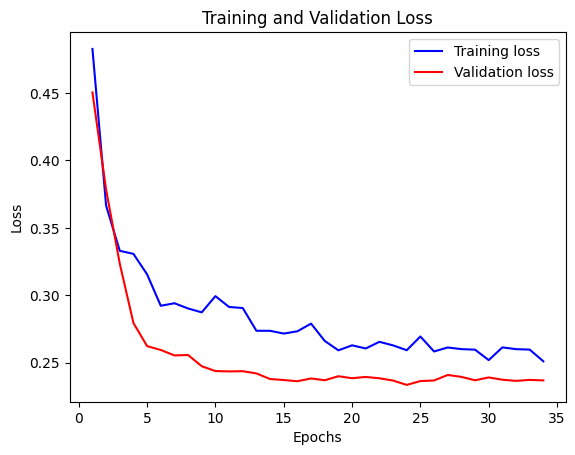

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.92      0.91      0.91       726



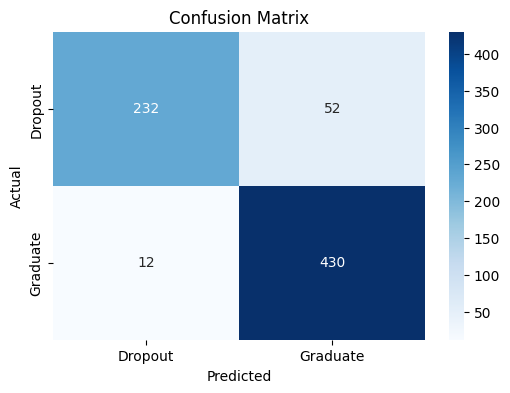

In [ ]:
# we start with neuron network
b_model_1, b_history_1 = define_model(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
loss_curve_plot(b_history_1)
b_evaluate_model(b_model_1, x_test, y_test)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5353 - loss: 1.0699 - val_accuracy: 0.5577 - val_loss: 0.8493
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7067 - loss: 0.7993 - val_accuracy: 0.5766 - val_loss: 0.8131
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7723 - loss: 0.6476 - val_accuracy: 0.6627 - val_loss: 0.7616
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8055 - loss: 0.6332 - val_accuracy: 0.7522 - val_loss: 0.7107
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8434 - loss: 0.5856 - val_accuracy: 0.8003 - val_loss: 0.6605
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8359 - loss: 0.5911 - val_accuracy: 0.8262 - val_loss: 0.6100
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8608 - loss: 0.5502 - val_accuracy: 0.8417 - val_loss: 0.5699
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.5360 - val_accuracy: 0.8520 - 

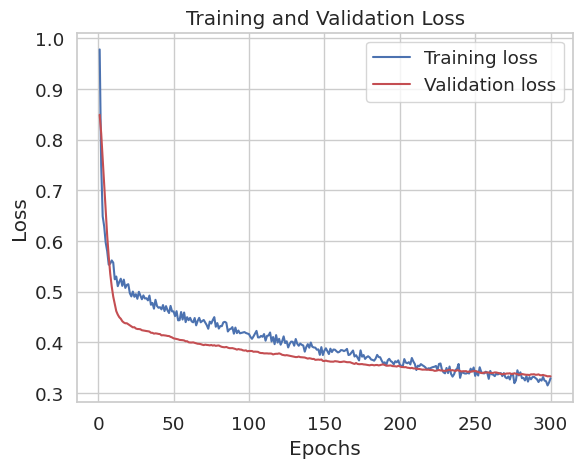

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       284
           1       0.91      0.95      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



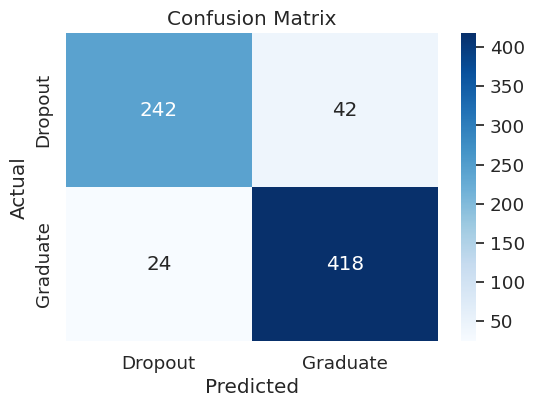

In [ ]:
b_model_2, b_history_2 = define_model(x_train, y_train, use_class_weight=True,optimization='adam', early_stopping=True, dropout=0.2, batch_size=64, epochs=300,learning_rate=0.0001, regularization_datatype='l2', regularization_rate=0.001, batch_normalization=True, verbose=1, patience=20)
loss_curve_plot(b_history_2)
b_evaluate_model(b_model_2, x_test, y_test)

Epoch 1/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6512 - loss: 2.6080 - val_accuracy: 0.5884 - val_loss: 2.4936
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7216 - loss: 2.4933 - val_accuracy: 0.5601 - val_loss: 2.4757
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7554 - loss: 2.3566 - val_accuracy: 0.5813 - val_loss: 2.4162
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7765 - loss: 2.2909 - val_accuracy: 0.6280 - val_loss: 2.3188
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7991 - loss: 2.2124 - val_accuracy: 0.7044 - val_loss: 2.2170
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8089 - loss: 2.1729 - val_accuracy: 0.7553 - val_loss: 2.1341
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8157 - loss: 2.1223 - val_accuracy: 0.8020 - val_loss: 2.0655
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 2.0902 - val_accuracy: 0.8190 - 

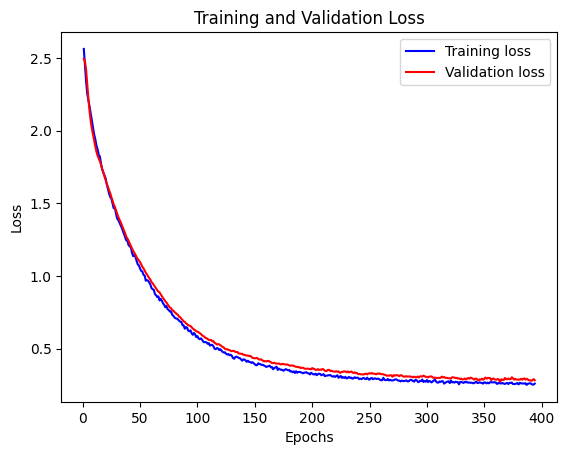

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       284
           1       0.91      0.97      0.94       442

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



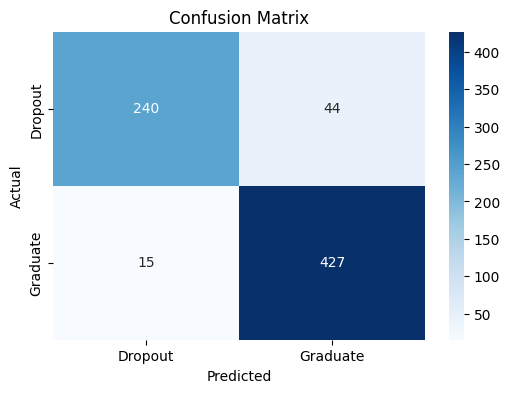

In [ ]:
b_model_3, b_history_3 = define_model(x_train, y_train, use_smote=True, optimization='rmsprop', early_stopping=True, dropout=0.4, batch_size=64, epochs=500,learning_rate=0.0001, regularization_datatype='l2', regularization_rate=0.01, batch_normalization=True, verbose=1, patience=30)
loss_curve_plot(b_history_3)
b_evaluate_model(b_model_3, x_test, y_test)

### **Random Forest Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split data into train, validation, and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set shape (features): {X_train.shape}")
print(f"Training set shape (target): {y_train.shape}")
print(f"Validation set shape (features): {X_val.shape}")
print(f"Validation set shape (target): {y_val.shape}")
print(f"Testing set shape (features): {X_test.shape}")
print(f"Testing set shape (target): {y_test.shape}")


# Define a function for training and validating a model (binary version)
def train_and_validate_model(model, X_train, y_train, X_val, y_val, model_name):
    """Trains and validates a binary classification model."""
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_proba_val = model.predict_proba(X_val)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_val, y_pred_val)
    balanced_acc = balanced_accuracy_score(y_val, y_pred_val)
    auc_score = roc_auc_score(y_val, y_pred_proba_val)  # binary AUC

    print(f"\n{model_name} Validation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred_val, zero_division=0)}")

    return model, y_pred_val

Training set shape (features): (2541, 10)
Training set shape (target): (2541,)
Validation set shape (features): (544, 10)
Validation set shape (target): (544,)
Testing set shape (features): (545, 10)
Testing set shape (target): (545,)


In [ ]:
b_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
b_rf_model, b_y_pred_val_rf = train_and_validate_model(b_rf_model, X_train, y_train, X_val, y_val, "Random Forest")


Random Forest Validation Metrics:
Accuracy: 0.9154
Balanced Accuracy: 0.9012
AUC: 0.9513
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       213
           1       0.90      0.97      0.93       331

    accuracy                           0.92       544
   macro avg       0.92      0.90      0.91       544
weighted avg       0.92      0.92      0.91       544



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [1, 0.5, 0.75]
}


# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=b_rf_model, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

print("Performing Grid Search for Random Forest...")
grid_search.fit(X_train, y_train)

print("Best parameters found for Random Forest: ", grid_search.best_params_)
print("Best cross-validation AUC: ", grid_search.best_score_)

best_b_rf_model = grid_search.best_estimator_

print("\nTuned Random Forest Model:")
train_and_validate_model(best_b_rf_model, X_train, y_train, X_val, y_val, "Tuned DF")


Performing Grid Search for Random Forest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found for Random Forest:  {'max_depth': 10, 'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation AUC:  0.9443536714788054

Tuned Random Forest Model:

Tuned DF Validation Metrics:
Accuracy: 0.9191
Balanced Accuracy: 0.9034
AUC: 0.9564
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       213
           1       0.90      0.98      0.94       331

    accuracy                           0.92       544
   macro avg       0.93      0.90      0.91       544
weighted avg       0.92      0.92      0.92       544



(RandomForestClassifier(max_depth=10, max_samples=0.5, min_samples_leaf=4,
                        random_state=42),
 array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0

### **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

b_dt_model = DecisionTreeClassifier(random_state=42)
b_dt_model, b_y_pred_val_dt = train_and_validate_model(b_dt_model, X_train, y_train, X_val, y_val, "Decision Tree")


Decision Tree Validation Metrics:
Accuracy: 0.8640
Balanced Accuracy: 0.8581
AUC: 0.8581
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       213
           1       0.89      0.89      0.89       331

    accuracy                           0.86       544
   macro avg       0.86      0.86      0.86       544
weighted avg       0.86      0.86      0.86       544



In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(estimator=b_dt_model, param_grid=dt_param_grid,
                              cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
print("Performing Grid Search for Decision Tree...")
dt_grid_search.fit(X_train, y_train)

print("\nBest parameters found for Decision Tree: ", dt_grid_search.best_params_)
print("Best cross-validation AUC for Decision Tree: ", dt_grid_search.best_score_)

best_b_dt_model = dt_grid_search.best_estimator_

print("\nTuned Decision Tree:")
train_and_validate_model(best_b_dt_model, X_train, y_train, X_val, y_val, "Tuned DT")


Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters found for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation AUC for Decision Tree:  0.9039317319450368

Tuned Decision Tree:

Tuned DT Validation Metrics:
Accuracy: 0.9118
Balanced Accuracy: 0.9024
AUC: 0.9393
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       213
           1       0.91      0.95      0.93       331

    accuracy                           0.91       544
   macro avg       0.91      0.90      0.91       544
weighted avg       0.91      0.91      0.91       544



(DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                        min_samples_split=10, random_state=42),
 array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### **XGBoost Model**

In [ ]:
import xgboost as xgb


b_xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
b_xgb_model, b_y_pred_val_xgb = train_and_validate_model(b_xgb_model, X_train, y_train, X_val, y_val, "XGBoost")


XGBoost Validation Metrics:
Accuracy: 0.9210
Balanced Accuracy: 0.9108
AUC: 0.9476
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       213
           1       0.92      0.96      0.94       331

    accuracy                           0.92       544
   macro avg       0.92      0.91      0.92       544
weighted avg       0.92      0.92      0.92       544



In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize a base XGBoost model for the grid search
xgb_grid_search = GridSearchCV(estimator=b_xgb_model, param_grid=xgb_param_grid,
                               cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

print("\nPerforming Grid Search for XGBoost...")
xgb_grid_search.fit(X_train, y_train)

print("\nBest parameters found for XGBoost: ", xgb_grid_search.best_params_)
print("Best cross-validation weighted AUC for XGBoost: ", xgb_grid_search.best_score_)

best_b_xgb_model = xgb_grid_search.best_estimator_

print("\nTuned XGBoost Model")
train_and_validate_model(best_b_xgb_model, X_train, y_train, X_val, y_val, "Tuned XGB")



Performing Grid Search for XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation weighted AUC for XGBoost:  0.9470563539064989

Tuned XGBoost Model

Tuned XGB Validation Metrics:
Accuracy: 0.9320
Balanced Accuracy: 0.9173
AUC: 0.9626
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       213
           1       0.91      0.98      0.95       331

    accuracy                           0.93       544
   macro avg       0.94      0.92      0.93       544
weighted avg       0.94      0.93      0.93       544



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 

## **Model Evaluation & Error analysis**

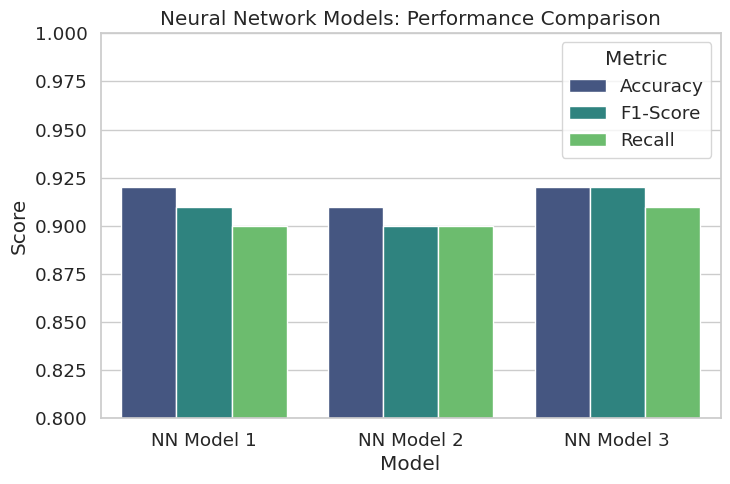

In [ ]:
# Comparison plot for Nueral Network Models
models = ['NN Model 1', 'NN Model 2', 'NN Model 3']
accuracy = [0.92, 0.91, 0.92]
f1_macro = [0.91, 0.90, 0.92]
recall_macro = [0.90, 0.90, 0.91]

df_nn = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1-Score': f1_macro,
    'Recall': recall_macro
})

# Plot
plt.figure(figsize=(8, 5))
df_nn_melted = df_nn.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=df_nn_melted, palette='viridis')
plt.ylim(0.80, 1.0)
plt.title('Neural Network Models: Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

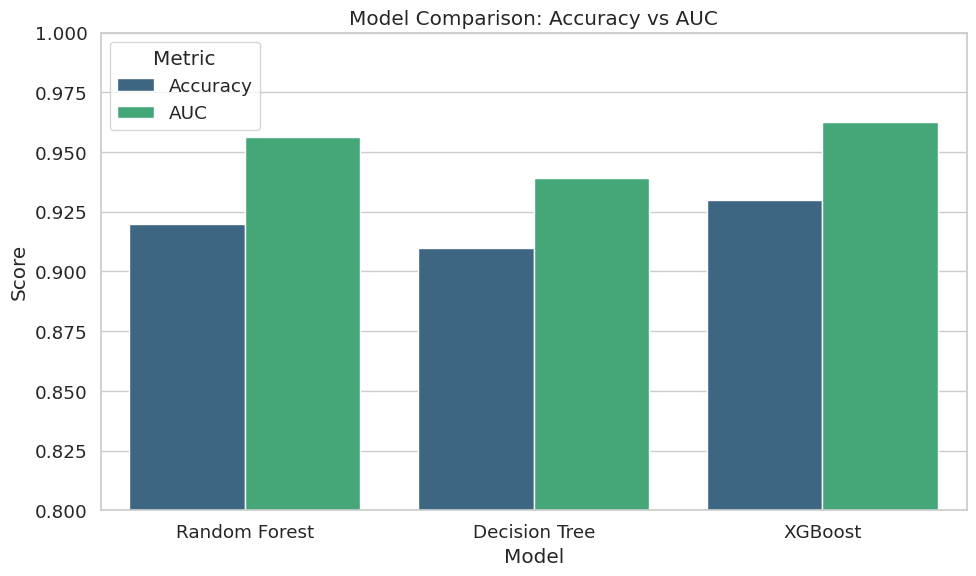

In [ ]:
# Comparison plot for Classical ML models
model_names = ['Random Forest', 'Decision Tree', 'XGBoost']
accuracies = [0.92, 0.91, 0.93]
aucs = [0.9564, 0.9393, 0.9626]

import pandas as pd
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'AUC': aucs
})

# Melt the DataFrame to long format
results_df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.2)


sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted,
            palette='viridis')

plt.title('Model Comparison: Accuracy vs AUC')
plt.ylim(0.80, 1.0)
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

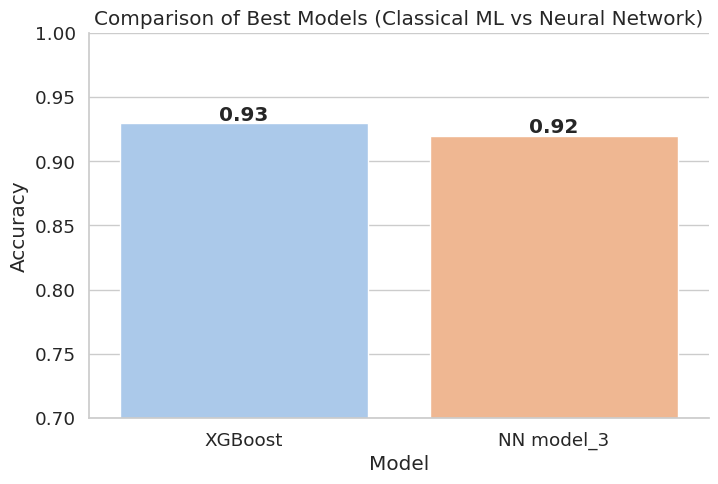

In [ ]:
models = ['XGBoost', 'NN model_3']
accuracy = [0.93, 0.92]

df_plot = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=df_plot, palette='pastel')

for index, row in df_plot.iterrows():
    plt.text(index, row.Accuracy + 0.002, f"{row.Accuracy:.2f}", ha='center', fontweight='bold')

plt.ylim(0.70, 1.0)
plt.ylabel('Accuracy')
plt.title('Comparison of Best Models (Classical ML vs Neural Network)')
sns.despine()
plt.show()

### **Error Analysis & Observations**

**Random Forest**

Accuracy: 0.92, AUC: 0.9564

Slightly lower than XGBoost but balanced recall/precision.

Strength: Handles class imbalance better, robust to overfitting.

**Decision Tree**

Accuracy: 0.91, AUC: 0.9393

Performs well but slightly overfits compared to ensemble models.

Lower precision for class 0, some misclassification observed.

**XGBoost**

Accuracy: 0.93, AUC: 0.9626

Best overall performance among classical ML.

Strong generalization and minimal overfitting.

**Neural Network (Model 3)**

Accuracy: 0.92

Good generalization, stable validation accuracy.

Slightly lower than XGBoost but competitive.

Confusion matrix shows strong class balance.

### **General Observations**

Ensemble methods (XGBoost, RF) outperform NN in this dataset, likely due to tabular structured data being well-suited to tree-based models.

NN shows stable performance but slightly lower precision for the minority class.


In [ ]:
# Save the best models

joblib.dump(b_model_3, 'nn_b_model.pkl')
joblib.dump(best_b_xgb_model, 'best_b_xgb_model.pkl')

['best_b_xgb_model.pkl']

## **Explainable AI (SHAP)**

After identifying the best performing model, I will use SHAP (SHapley Additive exPlanations) to interpret the model's predictions. SHAP is a game-theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory.

### **SHAP Interpretability**

I will be using SHAP with my best model.

In [ ]:
# Save background data for Explainability to use
background_data = X_train.sample(100, random_state=42)
joblib.dump(background_data, 'background_data.pkl')

['background_data.pkl']

In [ ]:
# SHAP for NN best model

explainer = shap.KernelExplainer(b_model_3, background_data)
shap_values = explainer.shap_values(background_data)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print(np.array(shap_values).shape)

(100, 10, 2)


# **Conclusion**

In this project, we built predictive models to classify student outcomes (Graduate vs Dropout) using available academic and demographic features. The workflow followed a systematic approach:

**Data Preprocessing**:

Selected relevant numerical and categorical features which were binary, avoiding unnecessary feature engineering to ensure frontend compatibility.

Scaled numerical features using StandardScaler while leaving categorical features as-is.

Adjusted the target to a binary classification problem by removing the 'Enrolled' class, simplifying model training.

**Model Development**:

Trained and tuned multiple classical ML models: Random Forest, Decision Tree, and XGBoost.

Hyperparameter tuning via Grid Search significantly improved performance, particularly for Random Forest and XGBoost.

Neural networks were trained with various configurations, including class weighting, SMOTE for imbalance, dropout, optimization and regularization, batch normalization, and early stopping.

**Model Evaluation**:

Classical ML models achieved high performance, with XGBoost being the best among them (Accuracy: 0.93, AUC: 0.96).

Among neural networks, Model 3 achieved the highest validation accuracy (0.92) and balanced class performance.

Comparison plots of accuracy and AUC between the best classical ML model and the neural network confirmed that XGBoost slightly outperforms the neural network.

**Error Analysis**:

Confusion matrices showed that models were slightly better at predicting the 'Graduate' class than 'Dropout', but overall precision, recall, and F1-scores were high for both classes due to class imbalance from the dataset.

Neural networks showed good stability and accuracy. Classical Models where slightly better because the dataset is tabular and they perform better than Nueral network on tabular data.

**Explainability**:

SHAP analysis was used to interpret model predictions, highlighting which features contributed most to the model’s decisions.

Background data sampled from the training set was used for SHAP explanations; explanations are computed for new unseen inputs without recomputing the model or retraining.


Classical ML models, particularly XGBoost, slightly performed better than neural networks, both in accuracy and stability. Neural networks still provide strong performance and flexibility for further tuning. SHAP explainability adds a crucial layer of interpretability, making it possible to understand individual predictions and integrate them into a backend/frontend system for transparent decision support.

In [51]:
# make a prediction
def make_predictions_with_explanation(model_path, background_path, x_input):
  with open(model_path, 'rb') as file:
    model = joblib.load(file)

  background_data = joblib.load(background_path)

  # Initialize SHAP explainer
  explainer = shap.KernelExplainer(model.predict, background_data)

  prediction = model.predict(x_input)
  pred_proba = model.predict_proba(x_input) if hasattr(model, 'predict_proba') else None


  shap_values = explainer.shap_values(x_input)
  return {
        "prediction": prediction,
        "probability": pred_proba,
        "shap_values": shap_values
    }


In [52]:
model_path = 'nn_b_model.pkl'
background_path = 'background_data.pkl'
prediction_result = make_predictions_with_explanation(model_path, background_path, x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/726 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s